In [1]:
import numpy as np
import cv2

# variables that you can adjust
driveName = r"\\.\PhysicalDrive1"  # Change this to the correct drive
sectorSize = 512    # The number of bytes in a sector (two hexidecimal numbers is 8 bits, or a byte)
startingSector = 2097152
frameWidth = 384    # The number of pixels in the width (Each pixel is a byte)
frameHeight = 296    # The number of pixels in the height
# numSecRecorded = 150
# fps = 20
numFrames2Read = 17805 # 15 mins. a little less than fps * numSecRecorded.. #1900

f = open(driveName, "rb")  # Open drive
f.seek(startingSector * sectorSize)  # Move to correct sector
writer = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 20, (frameWidth, frameHeight))

# Debug Variables on the Frame Footer
frameList = [] # 1. Each frame's number
intFrameTimes = [] # 2. When the frame is received from the sensor (in checkVSync, with frame_valid interrupt)
frameLines = [] # 3. The number of lines in each frame
frameDMA = [] # 4. Was DMA transfer completed?
frameNxtBuff = [] # 5. This one might actually need to be written in main.. actually it does.
mainFrameTimes = [] # 6. When the frame begins to be written to the SD card
mainFullBuffs = [] # 7. frameNumber - numWriteFrame in main 
intFullBuffs = [] # 8. frameNumber - sdImageWriteFrame in checkVSync(frame_valid) interrupt

frameArray = []

for numFrame in range(numFrames2Read):  # Loop through frames
    rawBytes = f.read(frameWidth * frameHeight)
    pixelValues = list(rawBytes)  # Converts from bytes to list. This and the next line can be done more efficiently
    

    frameNumberAr = pixelValues[-4:]
    frameNumber = frameNumberAr[0] + pow(16, 2) * frameNumberAr[1] + pow(16, 4) * frameNumberAr[2] + pow(16, 6) * frameNumberAr[3]   
    intTimestampAr = pixelValues[-8:-4]
    intTimestamp = intTimestampAr[0] + pow(16, 2) * intTimestampAr[1] + pow(16, 4) * intTimestampAr[2] + pow(16, 6) * intTimestampAr[3]
    lineCountAr = pixelValues[-12:-8]
    lineCount = lineCountAr[0] + pow(16, 2) * lineCountAr[1] + pow(16, 4) * lineCountAr[2] + pow(16, 6) * lineCountAr[3]   
    mainTimestampAr = pixelValues[-24:-20]
    mainTimestamp = mainTimestampAr[0] + pow(16, 2) * mainTimestampAr[1] + pow(16, 4) * mainTimestampAr[2] + pow(16, 6) * mainTimestampAr[3]
    

    frame = np.array(pixelValues)  # Convert to numpy array
    frame = np.reshape(frame, (frameHeight, frameWidth))  # reshape into correct frame dimensions
    
    # cv2.imshow("sdCard Video", frame / 255.0)  # Display frame
    # cv2.waitKey(0)  # Wait for button press to show next frame. Can use time.sleep(n) to increment frame every 'n' seconds
    # print(rawBytes.hex())

    # This chunk is just used to get things actually working. The proper way is to figure out how to write grayscale images to avi files
    tempFrame = np.zeros((frameHeight, frameWidth, 3))
    tempFrame[:, :, 0] = frame
    tempFrame[:, :, 1] = frame
    tempFrame[:, :, 2] = frame
    writer.write(tempFrame.astype("uint8"))
    
    frameList.append(frameNumber) #1
    intFrameTimes.append(intTimestamp) #2
    frameLines.append(lineCount) #3
    frameDMA.append(pixelValues[-16]) #4
    frameNxtBuff.append(pixelValues[-20]) #5
    mainFrameTimes.append(mainTimestamp) #6
    mainFullBuffs.append(pixelValues[-28]) #7
    intFullBuffs.append(pixelValues[-32]) #8
    
    print("Frame Number: ", frameNumber, "\t", 
          "Interrupt Timestamp: ", intTimestamp, "\t", 
          "Main Timestamp: ", mainTimestamp, "\t",
          "Main Buffers Ahead: ", pixelValues[-28], "\t",
          "Interrupt Buffers Ahead: ", pixelValues[-32], "\t",
          "\n")
    
    frameArray.append(frame)
f.close()
writer.release()

Frame Number:  0 	 Interrupt Timestamp:  56 	 Main Timestamp:  56 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1 	 Interrupt Timestamp:  107 	 Main Timestamp:  107 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2 	 Interrupt Timestamp:  157 	 Main Timestamp:  157 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3 	 Interrupt Timestamp:  207 	 Main Timestamp:  208 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4 	 Interrupt Timestamp:  258 	 Main Timestamp:  258 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5 	 Interrupt Timestamp:  308 	 Main Timestamp:  308 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6 	 Interrupt Timestamp:  359 	 Main Timestamp:  359 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7 	 Interrupt Timestamp:  409 	 Main Timestamp:  409 	 Main Buffers Ahead:  1 	 Interrupt Buffers 

Frame Number:  77 	 Interrupt Timestamp:  3940 	 Main Timestamp:  3940 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  78 	 Interrupt Timestamp:  3991 	 Main Timestamp:  3991 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  79 	 Interrupt Timestamp:  4041 	 Main Timestamp:  4041 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  80 	 Interrupt Timestamp:  4091 	 Main Timestamp:  4091 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  81 	 Interrupt Timestamp:  4142 	 Main Timestamp:  4142 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  82 	 Interrupt Timestamp:  4192 	 Main Timestamp:  4192 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  83 	 Interrupt Timestamp:  4243 	 Main Timestamp:  4243 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  84 	 Interrupt Timestamp:  4293 	 Main Timestamp:  4293 	 Main Buffers Ahea

Frame Number:  140 	 Interrupt Timestamp:  7118 	 Main Timestamp:  7118 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  141 	 Interrupt Timestamp:  7168 	 Main Timestamp:  7168 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  142 	 Interrupt Timestamp:  7219 	 Main Timestamp:  7219 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  143 	 Interrupt Timestamp:  7269 	 Main Timestamp:  7269 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  144 	 Interrupt Timestamp:  7320 	 Main Timestamp:  7320 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  145 	 Interrupt Timestamp:  7370 	 Main Timestamp:  7370 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  146 	 Interrupt Timestamp:  7421 	 Main Timestamp:  7421 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  147 	 Interrupt Timestamp:  7471 	 Main Timestamp:  7471 	 Main Buff

Frame Number:  205 	 Interrupt Timestamp:  10397 	 Main Timestamp:  10397 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  206 	 Interrupt Timestamp:  10447 	 Main Timestamp:  10447 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  207 	 Interrupt Timestamp:  10497 	 Main Timestamp:  10498 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  208 	 Interrupt Timestamp:  10548 	 Main Timestamp:  10548 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  209 	 Interrupt Timestamp:  10598 	 Main Timestamp:  10598 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  210 	 Interrupt Timestamp:  10649 	 Main Timestamp:  10649 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  211 	 Interrupt Timestamp:  10699 	 Main Timestamp:  10699 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  212 	 Interrupt Timestamp:  10750 	 Main Timestamp:  1

Frame Number:  272 	 Interrupt Timestamp:  13776 	 Main Timestamp:  13776 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  273 	 Interrupt Timestamp:  13827 	 Main Timestamp:  13827 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  274 	 Interrupt Timestamp:  13877 	 Main Timestamp:  13877 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  275 	 Interrupt Timestamp:  13928 	 Main Timestamp:  13928 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  276 	 Interrupt Timestamp:  13978 	 Main Timestamp:  13978 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  277 	 Interrupt Timestamp:  14028 	 Main Timestamp:  14028 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  278 	 Interrupt Timestamp:  14079 	 Main Timestamp:  14079 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  279 	 Interrupt Timestamp:  14129 	 Main Timestamp:  1

Frame Number:  341 	 Interrupt Timestamp:  17257 	 Main Timestamp:  17257 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  342 	 Interrupt Timestamp:  17307 	 Main Timestamp:  17307 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  343 	 Interrupt Timestamp:  17358 	 Main Timestamp:  17358 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  344 	 Interrupt Timestamp:  17408 	 Main Timestamp:  17408 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  345 	 Interrupt Timestamp:  17458 	 Main Timestamp:  17458 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  346 	 Interrupt Timestamp:  17509 	 Main Timestamp:  17509 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  347 	 Interrupt Timestamp:  17559 	 Main Timestamp:  17559 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  348 	 Interrupt Timestamp:  17610 	 Main Timestamp:  1

Frame Number:  408 	 Interrupt Timestamp:  20636 	 Main Timestamp:  20636 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  409 	 Interrupt Timestamp:  20687 	 Main Timestamp:  20687 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  410 	 Interrupt Timestamp:  20737 	 Main Timestamp:  20737 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  411 	 Interrupt Timestamp:  20788 	 Main Timestamp:  20788 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  412 	 Interrupt Timestamp:  20838 	 Main Timestamp:  20838 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  413 	 Interrupt Timestamp:  20888 	 Main Timestamp:  20888 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  414 	 Interrupt Timestamp:  20939 	 Main Timestamp:  20939 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  415 	 Interrupt Timestamp:  20989 	 Main Timestamp:  2

Frame Number:  472 	 Interrupt Timestamp:  23864 	 Main Timestamp:  23864 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  473 	 Interrupt Timestamp:  23915 	 Main Timestamp:  23915 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  474 	 Interrupt Timestamp:  23965 	 Main Timestamp:  23965 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  475 	 Interrupt Timestamp:  24016 	 Main Timestamp:  24016 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  476 	 Interrupt Timestamp:  24066 	 Main Timestamp:  24066 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  477 	 Interrupt Timestamp:  24117 	 Main Timestamp:  24117 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  478 	 Interrupt Timestamp:  24167 	 Main Timestamp:  24167 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  479 	 Interrupt Timestamp:  24218 	 Main Timestamp:  2

Frame Number:  541 	 Interrupt Timestamp:  27345 	 Main Timestamp:  27345 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  542 	 Interrupt Timestamp:  27395 	 Main Timestamp:  27395 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  543 	 Interrupt Timestamp:  27446 	 Main Timestamp:  27446 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  544 	 Interrupt Timestamp:  27496 	 Main Timestamp:  27496 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  545 	 Interrupt Timestamp:  27547 	 Main Timestamp:  27547 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  546 	 Interrupt Timestamp:  27597 	 Main Timestamp:  27597 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  547 	 Interrupt Timestamp:  27648 	 Main Timestamp:  27648 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  548 	 Interrupt Timestamp:  27698 	 Main Timestamp:  2

Frame Number:  604 	 Interrupt Timestamp:  30523 	 Main Timestamp:  30523 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  605 	 Interrupt Timestamp:  30573 	 Main Timestamp:  30573 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  606 	 Interrupt Timestamp:  30624 	 Main Timestamp:  30624 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  607 	 Interrupt Timestamp:  30674 	 Main Timestamp:  30674 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  608 	 Interrupt Timestamp:  30724 	 Main Timestamp:  30724 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  609 	 Interrupt Timestamp:  30775 	 Main Timestamp:  30775 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  610 	 Interrupt Timestamp:  30825 	 Main Timestamp:  30825 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  611 	 Interrupt Timestamp:  30876 	 Main Timestamp:  3

Frame Number:  676 	 Interrupt Timestamp:  34154 	 Main Timestamp:  34154 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  677 	 Interrupt Timestamp:  34205 	 Main Timestamp:  34205 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  678 	 Interrupt Timestamp:  34255 	 Main Timestamp:  34255 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  679 	 Interrupt Timestamp:  34306 	 Main Timestamp:  34306 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  680 	 Interrupt Timestamp:  34356 	 Main Timestamp:  34356 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  681 	 Interrupt Timestamp:  34407 	 Main Timestamp:  34407 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  682 	 Interrupt Timestamp:  34457 	 Main Timestamp:  34457 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  683 	 Interrupt Timestamp:  34508 	 Main Timestamp:  3

Frame Number:  739 	 Interrupt Timestamp:  37332 	 Main Timestamp:  37332 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  740 	 Interrupt Timestamp:  37383 	 Main Timestamp:  37383 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  741 	 Interrupt Timestamp:  37433 	 Main Timestamp:  37433 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  742 	 Interrupt Timestamp:  37484 	 Main Timestamp:  37484 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  743 	 Interrupt Timestamp:  37534 	 Main Timestamp:  37534 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  744 	 Interrupt Timestamp:  37584 	 Main Timestamp:  37584 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  745 	 Interrupt Timestamp:  37635 	 Main Timestamp:  37635 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  746 	 Interrupt Timestamp:  37685 	 Main Timestamp:  3

Frame Number:  808 	 Interrupt Timestamp:  40813 	 Main Timestamp:  40813 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  809 	 Interrupt Timestamp:  40863 	 Main Timestamp:  40863 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  810 	 Interrupt Timestamp:  40914 	 Main Timestamp:  40914 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  811 	 Interrupt Timestamp:  40964 	 Main Timestamp:  40964 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  812 	 Interrupt Timestamp:  41014 	 Main Timestamp:  41014 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  813 	 Interrupt Timestamp:  41065 	 Main Timestamp:  41065 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  814 	 Interrupt Timestamp:  41115 	 Main Timestamp:  41115 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  815 	 Interrupt Timestamp:  41166 	 Main Timestamp:  4

Frame Number:  873 	 Interrupt Timestamp:  44091 	 Main Timestamp:  44091 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  874 	 Interrupt Timestamp:  44142 	 Main Timestamp:  44142 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  875 	 Interrupt Timestamp:  44192 	 Main Timestamp:  44192 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  876 	 Interrupt Timestamp:  44243 	 Main Timestamp:  44243 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  877 	 Interrupt Timestamp:  44293 	 Main Timestamp:  44293 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  878 	 Interrupt Timestamp:  44344 	 Main Timestamp:  44344 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  879 	 Interrupt Timestamp:  44394 	 Main Timestamp:  44394 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  880 	 Interrupt Timestamp:  44444 	 Main Timestamp:  4

Frame Number:  945 	 Interrupt Timestamp:  47723 	 Main Timestamp:  47723 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  946 	 Interrupt Timestamp:  47774 	 Main Timestamp:  47774 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  947 	 Interrupt Timestamp:  47824 	 Main Timestamp:  47824 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  948 	 Interrupt Timestamp:  47874 	 Main Timestamp:  47875 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  949 	 Interrupt Timestamp:  47925 	 Main Timestamp:  47925 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  950 	 Interrupt Timestamp:  47975 	 Main Timestamp:  47975 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  951 	 Interrupt Timestamp:  48026 	 Main Timestamp:  48026 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  952 	 Interrupt Timestamp:  48076 	 Main Timestamp:  4

Frame Number:  1007 	 Interrupt Timestamp:  50851 	 Main Timestamp:  50851 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1008 	 Interrupt Timestamp:  50901 	 Main Timestamp:  50901 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1009 	 Interrupt Timestamp:  50951 	 Main Timestamp:  50951 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1010 	 Interrupt Timestamp:  51002 	 Main Timestamp:  51002 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1011 	 Interrupt Timestamp:  51052 	 Main Timestamp:  51052 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1012 	 Interrupt Timestamp:  51103 	 Main Timestamp:  51103 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1013 	 Interrupt Timestamp:  51153 	 Main Timestamp:  51153 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1014 	 Interrupt Timestamp:  51204 	 Main Times

Frame Number:  1068 	 Interrupt Timestamp:  53927 	 Main Timestamp:  53927 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1069 	 Interrupt Timestamp:  53978 	 Main Timestamp:  53978 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1070 	 Interrupt Timestamp:  54028 	 Main Timestamp:  54028 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1071 	 Interrupt Timestamp:  54079 	 Main Timestamp:  54079 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1072 	 Interrupt Timestamp:  54129 	 Main Timestamp:  54129 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1073 	 Interrupt Timestamp:  54180 	 Main Timestamp:  54180 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1074 	 Interrupt Timestamp:  54230 	 Main Timestamp:  54230 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1075 	 Interrupt Timestamp:  54281 	 Main Times

Frame Number:  1138 	 Interrupt Timestamp:  57458 	 Main Timestamp:  57458 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1139 	 Interrupt Timestamp:  57509 	 Main Timestamp:  57509 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1140 	 Interrupt Timestamp:  57559 	 Main Timestamp:  57559 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1141 	 Interrupt Timestamp:  57610 	 Main Timestamp:  57610 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1142 	 Interrupt Timestamp:  57660 	 Main Timestamp:  57660 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1143 	 Interrupt Timestamp:  57711 	 Main Timestamp:  57711 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1144 	 Interrupt Timestamp:  57761 	 Main Timestamp:  57761 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1145 	 Interrupt Timestamp:  57811 	 Main Times

Frame Number:  1207 	 Interrupt Timestamp:  60939 	 Main Timestamp:  60939 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1208 	 Interrupt Timestamp:  60989 	 Main Timestamp:  60989 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1209 	 Interrupt Timestamp:  61040 	 Main Timestamp:  61040 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1210 	 Interrupt Timestamp:  61090 	 Main Timestamp:  61090 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1211 	 Interrupt Timestamp:  61141 	 Main Timestamp:  61141 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1212 	 Interrupt Timestamp:  61191 	 Main Timestamp:  61191 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1213 	 Interrupt Timestamp:  61241 	 Main Timestamp:  61241 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1214 	 Interrupt Timestamp:  61292 	 Main Times

Frame Number:  1277 	 Interrupt Timestamp:  64470 	 Main Timestamp:  64470 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1278 	 Interrupt Timestamp:  64520 	 Main Timestamp:  64520 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1279 	 Interrupt Timestamp:  64571 	 Main Timestamp:  64571 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1280 	 Interrupt Timestamp:  64621 	 Main Timestamp:  64621 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1281 	 Interrupt Timestamp:  64671 	 Main Timestamp:  64671 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1282 	 Interrupt Timestamp:  64722 	 Main Timestamp:  64722 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1283 	 Interrupt Timestamp:  64772 	 Main Timestamp:  64772 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1284 	 Interrupt Timestamp:  64823 	 Main Times

Frame Number:  1339 	 Interrupt Timestamp:  67597 	 Main Timestamp:  67597 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1340 	 Interrupt Timestamp:  67647 	 Main Timestamp:  67648 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1341 	 Interrupt Timestamp:  67698 	 Main Timestamp:  67698 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1342 	 Interrupt Timestamp:  67748 	 Main Timestamp:  67748 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1343 	 Interrupt Timestamp:  67799 	 Main Timestamp:  67799 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1344 	 Interrupt Timestamp:  67849 	 Main Timestamp:  67849 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1345 	 Interrupt Timestamp:  67900 	 Main Timestamp:  67900 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1346 	 Interrupt Timestamp:  67950 	 Main Times

Frame Number:  1415 	 Interrupt Timestamp:  71431 	 Main Timestamp:  71431 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1416 	 Interrupt Timestamp:  71481 	 Main Timestamp:  71481 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1417 	 Interrupt Timestamp:  71531 	 Main Timestamp:  71531 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1418 	 Interrupt Timestamp:  71582 	 Main Timestamp:  71582 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1419 	 Interrupt Timestamp:  71632 	 Main Timestamp:  71632 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1420 	 Interrupt Timestamp:  71683 	 Main Timestamp:  71683 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1421 	 Interrupt Timestamp:  71733 	 Main Timestamp:  71733 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1422 	 Interrupt Timestamp:  71784 	 Main Times

Frame Number:  1486 	 Interrupt Timestamp:  75012 	 Main Timestamp:  75012 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1487 	 Interrupt Timestamp:  75062 	 Main Timestamp:  75062 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1488 	 Interrupt Timestamp:  75113 	 Main Timestamp:  75113 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1489 	 Interrupt Timestamp:  75163 	 Main Timestamp:  75163 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1490 	 Interrupt Timestamp:  75214 	 Main Timestamp:  75214 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1491 	 Interrupt Timestamp:  75264 	 Main Timestamp:  75264 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1492 	 Interrupt Timestamp:  75315 	 Main Timestamp:  75315 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1493 	 Interrupt Timestamp:  75365 	 Main Times

Frame Number:  1550 	 Interrupt Timestamp:  78240 	 Main Timestamp:  78240 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1551 	 Interrupt Timestamp:  78291 	 Main Timestamp:  78291 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1552 	 Interrupt Timestamp:  78341 	 Main Timestamp:  78341 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1553 	 Interrupt Timestamp:  78391 	 Main Timestamp:  78392 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1554 	 Interrupt Timestamp:  78442 	 Main Timestamp:  78442 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1555 	 Interrupt Timestamp:  78492 	 Main Timestamp:  78492 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1556 	 Interrupt Timestamp:  78543 	 Main Timestamp:  78543 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1557 	 Interrupt Timestamp:  78593 	 Main Times

Frame Number:  1617 	 Interrupt Timestamp:  81620 	 Main Timestamp:  81620 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1618 	 Interrupt Timestamp:  81670 	 Main Timestamp:  81670 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1619 	 Interrupt Timestamp:  81721 	 Main Timestamp:  81721 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1620 	 Interrupt Timestamp:  81771 	 Main Timestamp:  81771 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1621 	 Interrupt Timestamp:  81822 	 Main Timestamp:  81822 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1622 	 Interrupt Timestamp:  81872 	 Main Timestamp:  81872 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1623 	 Interrupt Timestamp:  81922 	 Main Timestamp:  81922 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1624 	 Interrupt Timestamp:  81973 	 Main Times

Frame Number:  1686 	 Interrupt Timestamp:  85100 	 Main Timestamp:  85100 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1687 	 Interrupt Timestamp:  85151 	 Main Timestamp:  85151 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1688 	 Interrupt Timestamp:  85201 	 Main Timestamp:  85201 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1689 	 Interrupt Timestamp:  85252 	 Main Timestamp:  85252 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1690 	 Interrupt Timestamp:  85302 	 Main Timestamp:  85302 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1691 	 Interrupt Timestamp:  85352 	 Main Timestamp:  85352 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1692 	 Interrupt Timestamp:  85403 	 Main Timestamp:  85403 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1693 	 Interrupt Timestamp:  85453 	 Main Times

Frame Number:  1751 	 Interrupt Timestamp:  88379 	 Main Timestamp:  88379 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1752 	 Interrupt Timestamp:  88429 	 Main Timestamp:  88429 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1753 	 Interrupt Timestamp:  88480 	 Main Timestamp:  88480 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1754 	 Interrupt Timestamp:  88530 	 Main Timestamp:  88530 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1755 	 Interrupt Timestamp:  88581 	 Main Timestamp:  88581 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1756 	 Interrupt Timestamp:  88631 	 Main Timestamp:  88631 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1757 	 Interrupt Timestamp:  88682 	 Main Timestamp:  88682 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1758 	 Interrupt Timestamp:  88732 	 Main Times

Frame Number:  1817 	 Interrupt Timestamp:  91708 	 Main Timestamp:  91708 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1818 	 Interrupt Timestamp:  91758 	 Main Timestamp:  91758 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1819 	 Interrupt Timestamp:  91809 	 Main Timestamp:  91809 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1820 	 Interrupt Timestamp:  91859 	 Main Timestamp:  91859 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1821 	 Interrupt Timestamp:  91910 	 Main Timestamp:  91910 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1822 	 Interrupt Timestamp:  91960 	 Main Timestamp:  91960 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1823 	 Interrupt Timestamp:  92011 	 Main Timestamp:  92011 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1824 	 Interrupt Timestamp:  92061 	 Main Times

Frame Number:  1889 	 Interrupt Timestamp:  95340 	 Main Timestamp:  95340 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1890 	 Interrupt Timestamp:  95390 	 Main Timestamp:  95390 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1891 	 Interrupt Timestamp:  95441 	 Main Timestamp:  95441 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1892 	 Interrupt Timestamp:  95491 	 Main Timestamp:  95491 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1893 	 Interrupt Timestamp:  95542 	 Main Timestamp:  95542 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1894 	 Interrupt Timestamp:  95592 	 Main Timestamp:  95592 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1895 	 Interrupt Timestamp:  95642 	 Main Timestamp:  95642 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1896 	 Interrupt Timestamp:  95693 	 Main Times

Frame Number:  1951 	 Interrupt Timestamp:  98467 	 Main Timestamp:  98467 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1952 	 Interrupt Timestamp:  98518 	 Main Timestamp:  98518 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1953 	 Interrupt Timestamp:  98568 	 Main Timestamp:  98568 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1954 	 Interrupt Timestamp:  98618 	 Main Timestamp:  98618 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1955 	 Interrupt Timestamp:  98669 	 Main Timestamp:  98669 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1956 	 Interrupt Timestamp:  98719 	 Main Timestamp:  98719 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1957 	 Interrupt Timestamp:  98770 	 Main Timestamp:  98770 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  1958 	 Interrupt Timestamp:  98820 	 Main Times

Frame Number:  2019 	 Interrupt Timestamp:  101897 	 Main Timestamp:  101897 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2020 	 Interrupt Timestamp:  101948 	 Main Timestamp:  101948 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2021 	 Interrupt Timestamp:  101998 	 Main Timestamp:  101998 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2022 	 Interrupt Timestamp:  102048 	 Main Timestamp:  102048 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2023 	 Interrupt Timestamp:  102099 	 Main Timestamp:  102099 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2024 	 Interrupt Timestamp:  102149 	 Main Timestamp:  102149 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2025 	 Interrupt Timestamp:  102200 	 Main Timestamp:  102200 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2026 	 Interrupt Timestamp:  1022

Frame Number:  2089 	 Interrupt Timestamp:  105428 	 Main Timestamp:  105428 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2090 	 Interrupt Timestamp:  105478 	 Main Timestamp:  105479 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2091 	 Interrupt Timestamp:  105529 	 Main Timestamp:  105529 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2092 	 Interrupt Timestamp:  105579 	 Main Timestamp:  105579 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2093 	 Interrupt Timestamp:  105630 	 Main Timestamp:  105630 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2094 	 Interrupt Timestamp:  105680 	 Main Timestamp:  105680 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2095 	 Interrupt Timestamp:  105731 	 Main Timestamp:  105731 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2096 	 Interrupt Timestamp:  1057

Frame Number:  2154 	 Interrupt Timestamp:  108707 	 Main Timestamp:  108707 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2155 	 Interrupt Timestamp:  108757 	 Main Timestamp:  108757 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2156 	 Interrupt Timestamp:  108808 	 Main Timestamp:  108808 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2157 	 Interrupt Timestamp:  108858 	 Main Timestamp:  108858 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2158 	 Interrupt Timestamp:  108908 	 Main Timestamp:  108909 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2159 	 Interrupt Timestamp:  108959 	 Main Timestamp:  108959 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2160 	 Interrupt Timestamp:  109009 	 Main Timestamp:  109009 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2161 	 Interrupt Timestamp:  1090

Frame Number:  2224 	 Interrupt Timestamp:  112238 	 Main Timestamp:  112238 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2225 	 Interrupt Timestamp:  112288 	 Main Timestamp:  112288 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2226 	 Interrupt Timestamp:  112339 	 Main Timestamp:  112339 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2227 	 Interrupt Timestamp:  112389 	 Main Timestamp:  112389 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2228 	 Interrupt Timestamp:  112439 	 Main Timestamp:  112439 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2229 	 Interrupt Timestamp:  112490 	 Main Timestamp:  112490 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2230 	 Interrupt Timestamp:  112540 	 Main Timestamp:  112540 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2231 	 Interrupt Timestamp:  1125

Frame Number:  2287 	 Interrupt Timestamp:  115415 	 Main Timestamp:  115415 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2288 	 Interrupt Timestamp:  115466 	 Main Timestamp:  115466 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2289 	 Interrupt Timestamp:  115516 	 Main Timestamp:  115516 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2290 	 Interrupt Timestamp:  115567 	 Main Timestamp:  115567 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2291 	 Interrupt Timestamp:  115617 	 Main Timestamp:  115617 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2292 	 Interrupt Timestamp:  115668 	 Main Timestamp:  115668 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2293 	 Interrupt Timestamp:  115718 	 Main Timestamp:  115718 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2294 	 Interrupt Timestamp:  1157

Frame Number:  2350 	 Interrupt Timestamp:  118593 	 Main Timestamp:  118593 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2351 	 Interrupt Timestamp:  118644 	 Main Timestamp:  118644 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2352 	 Interrupt Timestamp:  118694 	 Main Timestamp:  118694 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2353 	 Interrupt Timestamp:  118745 	 Main Timestamp:  118745 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2354 	 Interrupt Timestamp:  118795 	 Main Timestamp:  118795 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2355 	 Interrupt Timestamp:  118845 	 Main Timestamp:  118845 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2356 	 Interrupt Timestamp:  118896 	 Main Timestamp:  118896 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2357 	 Interrupt Timestamp:  1189

Frame Number:  2420 	 Interrupt Timestamp:  122124 	 Main Timestamp:  122124 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2421 	 Interrupt Timestamp:  122175 	 Main Timestamp:  122175 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2422 	 Interrupt Timestamp:  122225 	 Main Timestamp:  122225 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2423 	 Interrupt Timestamp:  122275 	 Main Timestamp:  122275 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2424 	 Interrupt Timestamp:  122326 	 Main Timestamp:  122326 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2425 	 Interrupt Timestamp:  122376 	 Main Timestamp:  122376 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2426 	 Interrupt Timestamp:  122427 	 Main Timestamp:  122427 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2427 	 Interrupt Timestamp:  1224

Frame Number:  2491 	 Interrupt Timestamp:  125705 	 Main Timestamp:  125705 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2492 	 Interrupt Timestamp:  125756 	 Main Timestamp:  125756 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2493 	 Interrupt Timestamp:  125806 	 Main Timestamp:  125806 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2494 	 Interrupt Timestamp:  125857 	 Main Timestamp:  125857 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2495 	 Interrupt Timestamp:  125907 	 Main Timestamp:  125907 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2496 	 Interrupt Timestamp:  125958 	 Main Timestamp:  125958 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2497 	 Interrupt Timestamp:  126008 	 Main Timestamp:  126008 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2498 	 Interrupt Timestamp:  1260

Frame Number:  2558 	 Interrupt Timestamp:  129085 	 Main Timestamp:  129085 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2559 	 Interrupt Timestamp:  129135 	 Main Timestamp:  129135 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2560 	 Interrupt Timestamp:  129186 	 Main Timestamp:  129186 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2561 	 Interrupt Timestamp:  129236 	 Main Timestamp:  129236 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2562 	 Interrupt Timestamp:  129287 	 Main Timestamp:  129287 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2563 	 Interrupt Timestamp:  129337 	 Main Timestamp:  129337 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2564 	 Interrupt Timestamp:  129388 	 Main Timestamp:  129388 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2565 	 Interrupt Timestamp:  1294

Frame Number:  2632 	 Interrupt Timestamp:  132818 	 Main Timestamp:  132818 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2633 	 Interrupt Timestamp:  132868 	 Main Timestamp:  132868 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2634 	 Interrupt Timestamp:  132919 	 Main Timestamp:  132919 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2635 	 Interrupt Timestamp:  132969 	 Main Timestamp:  132969 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2636 	 Interrupt Timestamp:  133019 	 Main Timestamp:  133019 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2637 	 Interrupt Timestamp:  133070 	 Main Timestamp:  133070 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2638 	 Interrupt Timestamp:  133120 	 Main Timestamp:  133120 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2639 	 Interrupt Timestamp:  1331

Frame Number:  2694 	 Interrupt Timestamp:  135945 	 Main Timestamp:  135945 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2695 	 Interrupt Timestamp:  135995 	 Main Timestamp:  135996 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2696 	 Interrupt Timestamp:  136046 	 Main Timestamp:  136046 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2697 	 Interrupt Timestamp:  136096 	 Main Timestamp:  136096 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2698 	 Interrupt Timestamp:  136147 	 Main Timestamp:  136147 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2699 	 Interrupt Timestamp:  136197 	 Main Timestamp:  136197 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2700 	 Interrupt Timestamp:  136248 	 Main Timestamp:  136248 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2701 	 Interrupt Timestamp:  1362


Frame Number:  2757 	 Interrupt Timestamp:  139123 	 Main Timestamp:  139123 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2758 	 Interrupt Timestamp:  139173 	 Main Timestamp:  139173 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2759 	 Interrupt Timestamp:  139224 	 Main Timestamp:  139224 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2760 	 Interrupt Timestamp:  139274 	 Main Timestamp:  139274 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2761 	 Interrupt Timestamp:  139325 	 Main Timestamp:  139325 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2762 	 Interrupt Timestamp:  139375 	 Main Timestamp:  139375 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2763 	 Interrupt Timestamp:  139425 	 Main Timestamp:  139426 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2764 	 Interrupt Timestamp:  139

Frame Number:  2822 	 Interrupt Timestamp:  142402 	 Main Timestamp:  142402 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2823 	 Interrupt Timestamp:  142452 	 Main Timestamp:  142452 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2824 	 Interrupt Timestamp:  142502 	 Main Timestamp:  142502 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2825 	 Interrupt Timestamp:  142553 	 Main Timestamp:  142553 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2826 	 Interrupt Timestamp:  142603 	 Main Timestamp:  142603 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2827 	 Interrupt Timestamp:  142654 	 Main Timestamp:  142654 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2828 	 Interrupt Timestamp:  142704 	 Main Timestamp:  142704 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2829 	 Interrupt Timestamp:  1427

Frame Number:  2883 	 Interrupt Timestamp:  145478 	 Main Timestamp:  145478 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2884 	 Interrupt Timestamp:  145529 	 Main Timestamp:  145529 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2885 	 Interrupt Timestamp:  145579 	 Main Timestamp:  145579 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2886 	 Interrupt Timestamp:  145630 	 Main Timestamp:  145630 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2887 	 Interrupt Timestamp:  145680 	 Main Timestamp:  145680 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2888 	 Interrupt Timestamp:  145731 	 Main Timestamp:  145731 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2889 	 Interrupt Timestamp:  145781 	 Main Timestamp:  145781 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2890 	 Interrupt Timestamp:  1458

Frame Number:  2948 	 Interrupt Timestamp:  148757 	 Main Timestamp:  148757 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2949 	 Interrupt Timestamp:  148808 	 Main Timestamp:  148808 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2950 	 Interrupt Timestamp:  148858 	 Main Timestamp:  148858 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2951 	 Interrupt Timestamp:  148908 	 Main Timestamp:  148908 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2952 	 Interrupt Timestamp:  148959 	 Main Timestamp:  148959 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2953 	 Interrupt Timestamp:  149009 	 Main Timestamp:  149009 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2954 	 Interrupt Timestamp:  149060 	 Main Timestamp:  149060 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  2955 	 Interrupt Timestamp:  1491

Frame Number:  3018 	 Interrupt Timestamp:  152288 	 Main Timestamp:  152288 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3019 	 Interrupt Timestamp:  152338 	 Main Timestamp:  152338 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3020 	 Interrupt Timestamp:  152389 	 Main Timestamp:  152389 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3021 	 Interrupt Timestamp:  152439 	 Main Timestamp:  152439 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3022 	 Interrupt Timestamp:  152490 	 Main Timestamp:  152490 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3023 	 Interrupt Timestamp:  152540 	 Main Timestamp:  152540 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3024 	 Interrupt Timestamp:  152591 	 Main Timestamp:  152591 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3025 	 Interrupt Timestamp:  1526

Frame Number:  3084 	 Interrupt Timestamp:  155617 	 Main Timestamp:  155617 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3085 	 Interrupt Timestamp:  155668 	 Main Timestamp:  155668 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3086 	 Interrupt Timestamp:  155718 	 Main Timestamp:  155718 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3087 	 Interrupt Timestamp:  155768 	 Main Timestamp:  155769 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3088 	 Interrupt Timestamp:  155819 	 Main Timestamp:  155819 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3089 	 Interrupt Timestamp:  155869 	 Main Timestamp:  155869 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3090 	 Interrupt Timestamp:  155920 	 Main Timestamp:  155920 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3091 	 Interrupt Timestamp:  1559

Frame Number:  3157 	 Interrupt Timestamp:  159299 	 Main Timestamp:  159299 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3158 	 Interrupt Timestamp:  159350 	 Main Timestamp:  159350 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3159 	 Interrupt Timestamp:  159400 	 Main Timestamp:  159400 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3160 	 Interrupt Timestamp:  159451 	 Main Timestamp:  159451 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3161 	 Interrupt Timestamp:  159501 	 Main Timestamp:  159501 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3162 	 Interrupt Timestamp:  159552 	 Main Timestamp:  159552 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3163 	 Interrupt Timestamp:  159602 	 Main Timestamp:  159602 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3164 	 Interrupt Timestamp:  1596

Frame Number:  3224 	 Interrupt Timestamp:  162679 	 Main Timestamp:  162679 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3225 	 Interrupt Timestamp:  162729 	 Main Timestamp:  162729 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3226 	 Interrupt Timestamp:  162780 	 Main Timestamp:  162780 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3227 	 Interrupt Timestamp:  162830 	 Main Timestamp:  162830 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3228 	 Interrupt Timestamp:  162881 	 Main Timestamp:  162881 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3229 	 Interrupt Timestamp:  162931 	 Main Timestamp:  162931 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3230 	 Interrupt Timestamp:  162982 	 Main Timestamp:  162982 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3231 	 Interrupt Timestamp:  1630

Frame Number:  3286 	 Interrupt Timestamp:  165806 	 Main Timestamp:  165806 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3287 	 Interrupt Timestamp:  165857 	 Main Timestamp:  165857 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3288 	 Interrupt Timestamp:  165907 	 Main Timestamp:  165907 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3289 	 Interrupt Timestamp:  165958 	 Main Timestamp:  165958 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3290 	 Interrupt Timestamp:  166008 	 Main Timestamp:  166008 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3291 	 Interrupt Timestamp:  166059 	 Main Timestamp:  166059 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3292 	 Interrupt Timestamp:  166109 	 Main Timestamp:  166109 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3293 	 Interrupt Timestamp:  1661

Frame Number:  3357 	 Interrupt Timestamp:  169388 	 Main Timestamp:  169388 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3358 	 Interrupt Timestamp:  169438 	 Main Timestamp:  169438 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3359 	 Interrupt Timestamp:  169489 	 Main Timestamp:  169489 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3360 	 Interrupt Timestamp:  169539 	 Main Timestamp:  169539 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3361 	 Interrupt Timestamp:  169589 	 Main Timestamp:  169589 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3362 	 Interrupt Timestamp:  169640 	 Main Timestamp:  169640 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3363 	 Interrupt Timestamp:  169690 	 Main Timestamp:  169690 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3364 	 Interrupt Timestamp:  1697

Frame Number:  3423 	 Interrupt Timestamp:  172717 	 Main Timestamp:  172717 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3424 	 Interrupt Timestamp:  172767 	 Main Timestamp:  172767 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3425 	 Interrupt Timestamp:  172818 	 Main Timestamp:  172818 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3426 	 Interrupt Timestamp:  172868 	 Main Timestamp:  172868 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3427 	 Interrupt Timestamp:  172919 	 Main Timestamp:  172919 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3428 	 Interrupt Timestamp:  172969 	 Main Timestamp:  172969 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3429 	 Interrupt Timestamp:  173019 	 Main Timestamp:  173019 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3430 	 Interrupt Timestamp:  1730

Frame Number:  3490 	 Interrupt Timestamp:  176096 	 Main Timestamp:  176096 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3491 	 Interrupt Timestamp:  176147 	 Main Timestamp:  176147 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3492 	 Interrupt Timestamp:  176197 	 Main Timestamp:  176197 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3493 	 Interrupt Timestamp:  176248 	 Main Timestamp:  176248 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3494 	 Interrupt Timestamp:  176298 	 Main Timestamp:  176298 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3495 	 Interrupt Timestamp:  176349 	 Main Timestamp:  176349 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3496 	 Interrupt Timestamp:  176399 	 Main Timestamp:  176399 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3497 	 Interrupt Timestamp:  1764

Frame Number:  3557 	 Interrupt Timestamp:  179476 	 Main Timestamp:  179476 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3558 	 Interrupt Timestamp:  179526 	 Main Timestamp:  179526 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3559 	 Interrupt Timestamp:  179577 	 Main Timestamp:  179577 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3560 	 Interrupt Timestamp:  179627 	 Main Timestamp:  179627 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3561 	 Interrupt Timestamp:  179678 	 Main Timestamp:  179678 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3562 	 Interrupt Timestamp:  179728 	 Main Timestamp:  179728 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3563 	 Interrupt Timestamp:  179779 	 Main Timestamp:  179779 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3564 	 Interrupt Timestamp:  1798

Frame Number:  3630 	 Interrupt Timestamp:  183158 	 Main Timestamp:  183158 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3631 	 Interrupt Timestamp:  183209 	 Main Timestamp:  183209 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3632 	 Interrupt Timestamp:  183259 	 Main Timestamp:  183259 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3633 	 Interrupt Timestamp:  183309 	 Main Timestamp:  183309 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3634 	 Interrupt Timestamp:  183360 	 Main Timestamp:  183360 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3635 	 Interrupt Timestamp:  183410 	 Main Timestamp:  183410 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3636 	 Interrupt Timestamp:  183461 	 Main Timestamp:  183461 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3637 	 Interrupt Timestamp:  1835

Frame Number:  3700 	 Interrupt Timestamp:  186689 	 Main Timestamp:  186689 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3701 	 Interrupt Timestamp:  186739 	 Main Timestamp:  186739 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3702 	 Interrupt Timestamp:  186790 	 Main Timestamp:  186790 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3703 	 Interrupt Timestamp:  186840 	 Main Timestamp:  186840 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3704 	 Interrupt Timestamp:  186891 	 Main Timestamp:  186891 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3705 	 Interrupt Timestamp:  186941 	 Main Timestamp:  186941 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3706 	 Interrupt Timestamp:  186992 	 Main Timestamp:  186992 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3707 	 Interrupt Timestamp:  1870

Frame Number:  3767 	 Interrupt Timestamp:  190069 	 Main Timestamp:  190069 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3768 	 Interrupt Timestamp:  190119 	 Main Timestamp:  190119 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3769 	 Interrupt Timestamp:  190169 	 Main Timestamp:  190169 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3770 	 Interrupt Timestamp:  190220 	 Main Timestamp:  190220 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3771 	 Interrupt Timestamp:  190270 	 Main Timestamp:  190270 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3772 	 Interrupt Timestamp:  190321 	 Main Timestamp:  190321 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3773 	 Interrupt Timestamp:  190371 	 Main Timestamp:  190371 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3774 	 Interrupt Timestamp:  1904

Frame Number:  3833 	 Interrupt Timestamp:  193398 	 Main Timestamp:  193398 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3834 	 Interrupt Timestamp:  193448 	 Main Timestamp:  193448 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3835 	 Interrupt Timestamp:  193499 	 Main Timestamp:  193499 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3836 	 Interrupt Timestamp:  193549 	 Main Timestamp:  193549 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3837 	 Interrupt Timestamp:  193599 	 Main Timestamp:  193600 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3838 	 Interrupt Timestamp:  193650 	 Main Timestamp:  193650 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3839 	 Interrupt Timestamp:  193700 	 Main Timestamp:  193700 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3840 	 Interrupt Timestamp:  1937

Frame Number:  3900 	 Interrupt Timestamp:  196777 	 Main Timestamp:  196777 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3901 	 Interrupt Timestamp:  196828 	 Main Timestamp:  196828 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3902 	 Interrupt Timestamp:  196878 	 Main Timestamp:  196878 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3903 	 Interrupt Timestamp:  196929 	 Main Timestamp:  196929 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3904 	 Interrupt Timestamp:  196979 	 Main Timestamp:  196979 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3905 	 Interrupt Timestamp:  197029 	 Main Timestamp:  197030 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3906 	 Interrupt Timestamp:  197080 	 Main Timestamp:  197080 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3907 	 Interrupt Timestamp:  1971

Frame Number:  3971 	 Interrupt Timestamp:  200359 	 Main Timestamp:  200359 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3972 	 Interrupt Timestamp:  200409 	 Main Timestamp:  200409 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3973 	 Interrupt Timestamp:  200460 	 Main Timestamp:  200460 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3974 	 Interrupt Timestamp:  200510 	 Main Timestamp:  200510 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3975 	 Interrupt Timestamp:  200560 	 Main Timestamp:  200560 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3976 	 Interrupt Timestamp:  200611 	 Main Timestamp:  200611 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3977 	 Interrupt Timestamp:  200661 	 Main Timestamp:  200661 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  3978 	 Interrupt Timestamp:  2007

Frame Number:  4040 	 Interrupt Timestamp:  203839 	 Main Timestamp:  203839 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4041 	 Interrupt Timestamp:  203890 	 Main Timestamp:  203890 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4042 	 Interrupt Timestamp:  203940 	 Main Timestamp:  203940 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4043 	 Interrupt Timestamp:  203990 	 Main Timestamp:  203990 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4044 	 Interrupt Timestamp:  204041 	 Main Timestamp:  204041 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4045 	 Interrupt Timestamp:  204091 	 Main Timestamp:  204091 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4046 	 Interrupt Timestamp:  204142 	 Main Timestamp:  204142 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4047 	 Interrupt Timestamp:  2041

Frame Number:  4110 	 Interrupt Timestamp:  207370 	 Main Timestamp:  207370 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4111 	 Interrupt Timestamp:  207420 	 Main Timestamp:  207420 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4112 	 Interrupt Timestamp:  207471 	 Main Timestamp:  207471 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4113 	 Interrupt Timestamp:  207521 	 Main Timestamp:  207521 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4114 	 Interrupt Timestamp:  207572 	 Main Timestamp:  207572 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4115 	 Interrupt Timestamp:  207622 	 Main Timestamp:  207622 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4116 	 Interrupt Timestamp:  207673 	 Main Timestamp:  207673 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4117 	 Interrupt Timestamp:  2077

Frame Number:  4172 	 Interrupt Timestamp:  210497 	 Main Timestamp:  210497 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4173 	 Interrupt Timestamp:  210548 	 Main Timestamp:  210548 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4174 	 Interrupt Timestamp:  210598 	 Main Timestamp:  210598 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4175 	 Interrupt Timestamp:  210649 	 Main Timestamp:  210649 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4176 	 Interrupt Timestamp:  210699 	 Main Timestamp:  210699 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4177 	 Interrupt Timestamp:  210750 	 Main Timestamp:  210750 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4178 	 Interrupt Timestamp:  210800 	 Main Timestamp:  210800 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4179 	 Interrupt Timestamp:  2108

Frame Number:  4240 	 Interrupt Timestamp:  213927 	 Main Timestamp:  213927 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4241 	 Interrupt Timestamp:  213978 	 Main Timestamp:  213978 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4242 	 Interrupt Timestamp:  214028 	 Main Timestamp:  214028 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4243 	 Interrupt Timestamp:  214079 	 Main Timestamp:  214079 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4244 	 Interrupt Timestamp:  214129 	 Main Timestamp:  214129 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4245 	 Interrupt Timestamp:  214180 	 Main Timestamp:  214180 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4246 	 Interrupt Timestamp:  214230 	 Main Timestamp:  214230 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4247 	 Interrupt Timestamp:  2142

Frame Number:  4315 	 Interrupt Timestamp:  217710 	 Main Timestamp:  217710 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4316 	 Interrupt Timestamp:  217761 	 Main Timestamp:  217761 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4317 	 Interrupt Timestamp:  217811 	 Main Timestamp:  217811 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4318 	 Interrupt Timestamp:  217862 	 Main Timestamp:  217862 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4319 	 Interrupt Timestamp:  217912 	 Main Timestamp:  217912 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4320 	 Interrupt Timestamp:  217963 	 Main Timestamp:  217963 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4321 	 Interrupt Timestamp:  218013 	 Main Timestamp:  218013 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4322 	 Interrupt Timestamp:  2180

Frame Number:  4381 	 Interrupt Timestamp:  221040 	 Main Timestamp:  221040 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4382 	 Interrupt Timestamp:  221090 	 Main Timestamp:  221090 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4383 	 Interrupt Timestamp:  221140 	 Main Timestamp:  221140 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4384 	 Interrupt Timestamp:  221191 	 Main Timestamp:  221191 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4385 	 Interrupt Timestamp:  221241 	 Main Timestamp:  221241 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4386 	 Interrupt Timestamp:  221292 	 Main Timestamp:  221292 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4387 	 Interrupt Timestamp:  221342 	 Main Timestamp:  221342 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4388 	 Interrupt Timestamp:  2213

Frame Number:  4452 	 Interrupt Timestamp:  224621 	 Main Timestamp:  224621 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4453 	 Interrupt Timestamp:  224671 	 Main Timestamp:  224671 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4454 	 Interrupt Timestamp:  224722 	 Main Timestamp:  224722 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4455 	 Interrupt Timestamp:  224772 	 Main Timestamp:  224772 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4456 	 Interrupt Timestamp:  224823 	 Main Timestamp:  224823 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4457 	 Interrupt Timestamp:  224873 	 Main Timestamp:  224873 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4458 	 Interrupt Timestamp:  224924 	 Main Timestamp:  224924 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4459 	 Interrupt Timestamp:  2249

Frame Number:  4525 	 Interrupt Timestamp:  228303 	 Main Timestamp:  228303 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4526 	 Interrupt Timestamp:  228354 	 Main Timestamp:  228354 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4527 	 Interrupt Timestamp:  228404 	 Main Timestamp:  228404 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4528 	 Interrupt Timestamp:  228454 	 Main Timestamp:  228454 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4529 	 Interrupt Timestamp:  228505 	 Main Timestamp:  228505 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4530 	 Interrupt Timestamp:  228555 	 Main Timestamp:  228555 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4531 	 Interrupt Timestamp:  228606 	 Main Timestamp:  228606 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4532 	 Interrupt Timestamp:  2286

Frame Number:  4602 	 Interrupt Timestamp:  232187 	 Main Timestamp:  232187 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4603 	 Interrupt Timestamp:  232238 	 Main Timestamp:  232238 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4604 	 Interrupt Timestamp:  232288 	 Main Timestamp:  232288 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4605 	 Interrupt Timestamp:  232338 	 Main Timestamp:  232338 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4606 	 Interrupt Timestamp:  232389 	 Main Timestamp:  232389 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4607 	 Interrupt Timestamp:  232439 	 Main Timestamp:  232439 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4608 	 Interrupt Timestamp:  232490 	 Main Timestamp:  232490 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4609 	 Interrupt Timestamp:  2325

Frame Number:  4670 	 Interrupt Timestamp:  235617 	 Main Timestamp:  235617 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4671 	 Interrupt Timestamp:  235668 	 Main Timestamp:  235668 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4672 	 Interrupt Timestamp:  235718 	 Main Timestamp:  235718 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4673 	 Interrupt Timestamp:  235768 	 Main Timestamp:  235768 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4674 	 Interrupt Timestamp:  235819 	 Main Timestamp:  235819 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4675 	 Interrupt Timestamp:  235869 	 Main Timestamp:  235869 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4676 	 Interrupt Timestamp:  235920 	 Main Timestamp:  235920 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4677 	 Interrupt Timestamp:  2359

Frame Number:  4734 	 Interrupt Timestamp:  238845 	 Main Timestamp:  238845 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4735 	 Interrupt Timestamp:  238896 	 Main Timestamp:  238896 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4736 	 Interrupt Timestamp:  238946 	 Main Timestamp:  238946 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4737 	 Interrupt Timestamp:  238997 	 Main Timestamp:  238997 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4738 	 Interrupt Timestamp:  239047 	 Main Timestamp:  239047 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4739 	 Interrupt Timestamp:  239098 	 Main Timestamp:  239098 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4740 	 Interrupt Timestamp:  239148 	 Main Timestamp:  239148 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4741 	 Interrupt Timestamp:  2391

Frame Number:  4800 	 Interrupt Timestamp:  242174 	 Main Timestamp:  242174 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4801 	 Interrupt Timestamp:  242225 	 Main Timestamp:  242225 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4802 	 Interrupt Timestamp:  242275 	 Main Timestamp:  242275 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4803 	 Interrupt Timestamp:  242326 	 Main Timestamp:  242326 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4804 	 Interrupt Timestamp:  242376 	 Main Timestamp:  242376 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4805 	 Interrupt Timestamp:  242427 	 Main Timestamp:  242427 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4806 	 Interrupt Timestamp:  242477 	 Main Timestamp:  242477 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4807 	 Interrupt Timestamp:  2425

Frame Number:  4866 	 Interrupt Timestamp:  245504 	 Main Timestamp:  245504 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4867 	 Interrupt Timestamp:  245554 	 Main Timestamp:  245554 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4868 	 Interrupt Timestamp:  245604 	 Main Timestamp:  245605 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4869 	 Interrupt Timestamp:  245655 	 Main Timestamp:  245655 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4870 	 Interrupt Timestamp:  245705 	 Main Timestamp:  245705 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4871 	 Interrupt Timestamp:  245756 	 Main Timestamp:  245756 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4872 	 Interrupt Timestamp:  245806 	 Main Timestamp:  245806 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4873 	 Interrupt Timestamp:  2458

Frame Number:  4930 	 Interrupt Timestamp:  248732 	 Main Timestamp:  248732 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4931 	 Interrupt Timestamp:  248782 	 Main Timestamp:  248782 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4932 	 Interrupt Timestamp:  248833 	 Main Timestamp:  248833 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4933 	 Interrupt Timestamp:  248883 	 Main Timestamp:  248883 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4934 	 Interrupt Timestamp:  248934 	 Main Timestamp:  248934 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4935 	 Interrupt Timestamp:  248984 	 Main Timestamp:  248984 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4936 	 Interrupt Timestamp:  249034 	 Main Timestamp:  249035 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4937 	 Interrupt Timestamp:  2490

Frame Number:  4996 	 Interrupt Timestamp:  252061 	 Main Timestamp:  252061 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4997 	 Interrupt Timestamp:  252111 	 Main Timestamp:  252111 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4998 	 Interrupt Timestamp:  252162 	 Main Timestamp:  252162 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  4999 	 Interrupt Timestamp:  252212 	 Main Timestamp:  252212 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5000 	 Interrupt Timestamp:  252263 	 Main Timestamp:  252263 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5001 	 Interrupt Timestamp:  252313 	 Main Timestamp:  252313 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5002 	 Interrupt Timestamp:  252364 	 Main Timestamp:  252364 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5003 	 Interrupt Timestamp:  2524

Frame Number:  5061 	 Interrupt Timestamp:  255340 	 Main Timestamp:  255340 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5062 	 Interrupt Timestamp:  255390 	 Main Timestamp:  255390 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5063 	 Interrupt Timestamp:  255441 	 Main Timestamp:  255441 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5064 	 Interrupt Timestamp:  255491 	 Main Timestamp:  255491 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5065 	 Interrupt Timestamp:  255541 	 Main Timestamp:  255541 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5066 	 Interrupt Timestamp:  255592 	 Main Timestamp:  255592 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5067 	 Interrupt Timestamp:  255642 	 Main Timestamp:  255642 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5068 	 Interrupt Timestamp:  2556

Frame Number:  5128 	 Interrupt Timestamp:  258719 	 Main Timestamp:  258719 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5129 	 Interrupt Timestamp:  258770 	 Main Timestamp:  258770 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5130 	 Interrupt Timestamp:  258820 	 Main Timestamp:  258820 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5131 	 Interrupt Timestamp:  258871 	 Main Timestamp:  258871 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5132 	 Interrupt Timestamp:  258921 	 Main Timestamp:  258921 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5133 	 Interrupt Timestamp:  258971 	 Main Timestamp:  258971 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5134 	 Interrupt Timestamp:  259022 	 Main Timestamp:  259022 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5135 	 Interrupt Timestamp:  2590

Frame Number:  5192 	 Interrupt Timestamp:  261947 	 Main Timestamp:  261947 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5193 	 Interrupt Timestamp:  261998 	 Main Timestamp:  261998 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5194 	 Interrupt Timestamp:  262048 	 Main Timestamp:  262048 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5195 	 Interrupt Timestamp:  262099 	 Main Timestamp:  262099 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5196 	 Interrupt Timestamp:  262149 	 Main Timestamp:  262149 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5197 	 Interrupt Timestamp:  262200 	 Main Timestamp:  262200 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5198 	 Interrupt Timestamp:  262250 	 Main Timestamp:  262250 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5199 	 Interrupt Timestamp:  2623

Frame Number:  5258 	 Interrupt Timestamp:  265277 	 Main Timestamp:  265277 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5259 	 Interrupt Timestamp:  265327 	 Main Timestamp:  265327 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5260 	 Interrupt Timestamp:  265377 	 Main Timestamp:  265378 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5261 	 Interrupt Timestamp:  265428 	 Main Timestamp:  265428 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5262 	 Interrupt Timestamp:  265478 	 Main Timestamp:  265478 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5263 	 Interrupt Timestamp:  265529 	 Main Timestamp:  265529 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5264 	 Interrupt Timestamp:  265579 	 Main Timestamp:  265579 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5265 	 Interrupt Timestamp:  2656

Frame Number:  5320 	 Interrupt Timestamp:  268404 	 Main Timestamp:  268404 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5321 	 Interrupt Timestamp:  268454 	 Main Timestamp:  268454 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5322 	 Interrupt Timestamp:  268505 	 Main Timestamp:  268505 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5323 	 Interrupt Timestamp:  268555 	 Main Timestamp:  268555 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5324 	 Interrupt Timestamp:  268606 	 Main Timestamp:  268606 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5325 	 Interrupt Timestamp:  268656 	 Main Timestamp:  268656 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5326 	 Interrupt Timestamp:  268707 	 Main Timestamp:  268707 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5327 	 Interrupt Timestamp:  2687

Frame Number:  5385 	 Interrupt Timestamp:  271683 	 Main Timestamp:  271683 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5386 	 Interrupt Timestamp:  271733 	 Main Timestamp:  271733 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5387 	 Interrupt Timestamp:  271784 	 Main Timestamp:  271784 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5388 	 Interrupt Timestamp:  271834 	 Main Timestamp:  271834 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5389 	 Interrupt Timestamp:  271884 	 Main Timestamp:  271884 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5390 	 Interrupt Timestamp:  271935 	 Main Timestamp:  271935 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5391 	 Interrupt Timestamp:  271985 	 Main Timestamp:  271985 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5392 	 Interrupt Timestamp:  2720

Frame Number:  5449 	 Interrupt Timestamp:  274911 	 Main Timestamp:  274911 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5450 	 Interrupt Timestamp:  274961 	 Main Timestamp:  274961 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5451 	 Interrupt Timestamp:  275012 	 Main Timestamp:  275012 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5452 	 Interrupt Timestamp:  275062 	 Main Timestamp:  275062 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5453 	 Interrupt Timestamp:  275113 	 Main Timestamp:  275113 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5454 	 Interrupt Timestamp:  275163 	 Main Timestamp:  275163 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5455 	 Interrupt Timestamp:  275214 	 Main Timestamp:  275214 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5456 	 Interrupt Timestamp:  2752

Frame Number:  5518 	 Interrupt Timestamp:  278391 	 Main Timestamp:  278391 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5519 	 Interrupt Timestamp:  278442 	 Main Timestamp:  278442 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5520 	 Interrupt Timestamp:  278492 	 Main Timestamp:  278492 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5521 	 Interrupt Timestamp:  278543 	 Main Timestamp:  278543 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5522 	 Interrupt Timestamp:  278593 	 Main Timestamp:  278593 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5523 	 Interrupt Timestamp:  278644 	 Main Timestamp:  278644 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5524 	 Interrupt Timestamp:  278694 	 Main Timestamp:  278694 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5525 	 Interrupt Timestamp:  2787

Frame Number:  5580 	 Interrupt Timestamp:  281519 	 Main Timestamp:  281519 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5581 	 Interrupt Timestamp:  281569 	 Main Timestamp:  281569 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5582 	 Interrupt Timestamp:  281620 	 Main Timestamp:  281620 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5583 	 Interrupt Timestamp:  281670 	 Main Timestamp:  281670 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5584 	 Interrupt Timestamp:  281720 	 Main Timestamp:  281720 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5585 	 Interrupt Timestamp:  281771 	 Main Timestamp:  281771 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5586 	 Interrupt Timestamp:  281821 	 Main Timestamp:  281821 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5587 	 Interrupt Timestamp:  2818

Frame Number:  5653 	 Interrupt Timestamp:  285201 	 Main Timestamp:  285201 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5654 	 Interrupt Timestamp:  285251 	 Main Timestamp:  285251 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5655 	 Interrupt Timestamp:  285302 	 Main Timestamp:  285302 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5656 	 Interrupt Timestamp:  285352 	 Main Timestamp:  285352 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5657 	 Interrupt Timestamp:  285403 	 Main Timestamp:  285403 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5658 	 Interrupt Timestamp:  285453 	 Main Timestamp:  285453 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5659 	 Interrupt Timestamp:  285504 	 Main Timestamp:  285504 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5660 	 Interrupt Timestamp:  2855

Frame Number:  5727 	 Interrupt Timestamp:  288934 	 Main Timestamp:  288934 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5728 	 Interrupt Timestamp:  288984 	 Main Timestamp:  288984 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5729 	 Interrupt Timestamp:  289034 	 Main Timestamp:  289034 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5730 	 Interrupt Timestamp:  289085 	 Main Timestamp:  289085 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5731 	 Interrupt Timestamp:  289135 	 Main Timestamp:  289135 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5732 	 Interrupt Timestamp:  289186 	 Main Timestamp:  289186 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5733 	 Interrupt Timestamp:  289236 	 Main Timestamp:  289236 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5734 	 Interrupt Timestamp:  2892

Frame Number:  5788 	 Interrupt Timestamp:  292011 	 Main Timestamp:  292011 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5789 	 Interrupt Timestamp:  292061 	 Main Timestamp:  292061 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5790 	 Interrupt Timestamp:  292111 	 Main Timestamp:  292111 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5791 	 Interrupt Timestamp:  292162 	 Main Timestamp:  292162 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5792 	 Interrupt Timestamp:  292212 	 Main Timestamp:  292212 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5793 	 Interrupt Timestamp:  292263 	 Main Timestamp:  292263 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5794 	 Interrupt Timestamp:  292313 	 Main Timestamp:  292313 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5795 	 Interrupt Timestamp:  2923

Frame Number:  5854 	 Interrupt Timestamp:  295340 	 Main Timestamp:  295340 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5855 	 Interrupt Timestamp:  295390 	 Main Timestamp:  295390 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5856 	 Interrupt Timestamp:  295441 	 Main Timestamp:  295441 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5857 	 Interrupt Timestamp:  295491 	 Main Timestamp:  295491 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5858 	 Interrupt Timestamp:  295541 	 Main Timestamp:  295541 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5859 	 Interrupt Timestamp:  295592 	 Main Timestamp:  295592 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5860 	 Interrupt Timestamp:  295642 	 Main Timestamp:  295642 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5861 	 Interrupt Timestamp:  2956

Frame Number:  5926 	 Interrupt Timestamp:  298971 	 Main Timestamp:  298971 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5927 	 Interrupt Timestamp:  299022 	 Main Timestamp:  299022 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5928 	 Interrupt Timestamp:  299072 	 Main Timestamp:  299072 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5929 	 Interrupt Timestamp:  299123 	 Main Timestamp:  299123 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5930 	 Interrupt Timestamp:  299173 	 Main Timestamp:  299173 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5931 	 Interrupt Timestamp:  299224 	 Main Timestamp:  299224 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5932 	 Interrupt Timestamp:  299274 	 Main Timestamp:  299274 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5933 	 Interrupt Timestamp:  2993

Frame Number:  5989 	 Interrupt Timestamp:  302149 	 Main Timestamp:  302149 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5990 	 Interrupt Timestamp:  302200 	 Main Timestamp:  302200 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5991 	 Interrupt Timestamp:  302250 	 Main Timestamp:  302250 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5992 	 Interrupt Timestamp:  302301 	 Main Timestamp:  302301 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5993 	 Interrupt Timestamp:  302351 	 Main Timestamp:  302351 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5994 	 Interrupt Timestamp:  302401 	 Main Timestamp:  302401 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5995 	 Interrupt Timestamp:  302452 	 Main Timestamp:  302452 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  5996 	 Interrupt Timestamp:  3025

Frame Number:  6065 	 Interrupt Timestamp:  305983 	 Main Timestamp:  305983 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6066 	 Interrupt Timestamp:  306033 	 Main Timestamp:  306033 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6067 	 Interrupt Timestamp:  306084 	 Main Timestamp:  306084 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6068 	 Interrupt Timestamp:  306134 	 Main Timestamp:  306134 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6069 	 Interrupt Timestamp:  306185 	 Main Timestamp:  306185 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6070 	 Interrupt Timestamp:  306235 	 Main Timestamp:  306235 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6071 	 Interrupt Timestamp:  306285 	 Main Timestamp:  306285 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6072 	 Interrupt Timestamp:  3063

Frame Number:  6137 	 Interrupt Timestamp:  309615 	 Main Timestamp:  309615 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6138 	 Interrupt Timestamp:  309665 	 Main Timestamp:  309665 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6139 	 Interrupt Timestamp:  309715 	 Main Timestamp:  309715 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6140 	 Interrupt Timestamp:  309766 	 Main Timestamp:  309766 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6141 	 Interrupt Timestamp:  309816 	 Main Timestamp:  309816 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6142 	 Interrupt Timestamp:  309867 	 Main Timestamp:  309867 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6143 	 Interrupt Timestamp:  309917 	 Main Timestamp:  309917 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6144 	 Interrupt Timestamp:  3099

Frame Number:  6201 	 Interrupt Timestamp:  312843 	 Main Timestamp:  312843 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6202 	 Interrupt Timestamp:  312893 	 Main Timestamp:  312893 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6203 	 Interrupt Timestamp:  312944 	 Main Timestamp:  312944 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6204 	 Interrupt Timestamp:  312994 	 Main Timestamp:  312994 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6205 	 Interrupt Timestamp:  313045 	 Main Timestamp:  313045 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6206 	 Interrupt Timestamp:  313095 	 Main Timestamp:  313095 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6207 	 Interrupt Timestamp:  313145 	 Main Timestamp:  313145 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6208 	 Interrupt Timestamp:  3131

Frame Number:  6270 	 Interrupt Timestamp:  316323 	 Main Timestamp:  316323 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6271 	 Interrupt Timestamp:  316374 	 Main Timestamp:  316374 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6272 	 Interrupt Timestamp:  316424 	 Main Timestamp:  316424 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6273 	 Interrupt Timestamp:  316475 	 Main Timestamp:  316475 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6274 	 Interrupt Timestamp:  316525 	 Main Timestamp:  316525 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6275 	 Interrupt Timestamp:  316575 	 Main Timestamp:  316575 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6276 	 Interrupt Timestamp:  316626 	 Main Timestamp:  316626 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6277 	 Interrupt Timestamp:  3166

Frame Number:  6343 	 Interrupt Timestamp:  320005 	 Main Timestamp:  320005 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6344 	 Interrupt Timestamp:  320056 	 Main Timestamp:  320056 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6345 	 Interrupt Timestamp:  320106 	 Main Timestamp:  320106 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6346 	 Interrupt Timestamp:  320157 	 Main Timestamp:  320157 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6347 	 Interrupt Timestamp:  320207 	 Main Timestamp:  320207 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6348 	 Interrupt Timestamp:  320258 	 Main Timestamp:  320258 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6349 	 Interrupt Timestamp:  320308 	 Main Timestamp:  320308 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6350 	 Interrupt Timestamp:  3203

Frame Number:  6403 	 Interrupt Timestamp:  323032 	 Main Timestamp:  323032 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6404 	 Interrupt Timestamp:  323082 	 Main Timestamp:  323082 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6405 	 Interrupt Timestamp:  323133 	 Main Timestamp:  323133 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6406 	 Interrupt Timestamp:  323183 	 Main Timestamp:  323183 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6407 	 Interrupt Timestamp:  323234 	 Main Timestamp:  323234 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6408 	 Interrupt Timestamp:  323284 	 Main Timestamp:  323284 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6409 	 Interrupt Timestamp:  323335 	 Main Timestamp:  323335 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6410 	 Interrupt Timestamp:  3233

Frame Number:  6474 	 Interrupt Timestamp:  326613 	 Main Timestamp:  326613 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6475 	 Interrupt Timestamp:  326664 	 Main Timestamp:  326664 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6476 	 Interrupt Timestamp:  326714 	 Main Timestamp:  326714 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6477 	 Interrupt Timestamp:  326765 	 Main Timestamp:  326765 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6478 	 Interrupt Timestamp:  326815 	 Main Timestamp:  326815 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6479 	 Interrupt Timestamp:  326865 	 Main Timestamp:  326865 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6480 	 Interrupt Timestamp:  326916 	 Main Timestamp:  326916 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6481 	 Interrupt Timestamp:  3269

Frame Number:  6540 	 Interrupt Timestamp:  329942 	 Main Timestamp:  329942 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6541 	 Interrupt Timestamp:  329993 	 Main Timestamp:  329993 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6542 	 Interrupt Timestamp:  330043 	 Main Timestamp:  330043 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6543 	 Interrupt Timestamp:  330094 	 Main Timestamp:  330094 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6544 	 Interrupt Timestamp:  330144 	 Main Timestamp:  330144 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6545 	 Interrupt Timestamp:  330195 	 Main Timestamp:  330195 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6546 	 Interrupt Timestamp:  330245 	 Main Timestamp:  330245 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6547 	 Interrupt Timestamp:  3302

Frame Number:  6610 	 Interrupt Timestamp:  333473 	 Main Timestamp:  333473 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6611 	 Interrupt Timestamp:  333524 	 Main Timestamp:  333524 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6612 	 Interrupt Timestamp:  333574 	 Main Timestamp:  333574 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6613 	 Interrupt Timestamp:  333625 	 Main Timestamp:  333625 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6614 	 Interrupt Timestamp:  333675 	 Main Timestamp:  333675 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6615 	 Interrupt Timestamp:  333725 	 Main Timestamp:  333725 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6616 	 Interrupt Timestamp:  333776 	 Main Timestamp:  333776 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6617 	 Interrupt Timestamp:  3338

Frame Number:  6683 	 Interrupt Timestamp:  337155 	 Main Timestamp:  337156 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6684 	 Interrupt Timestamp:  337206 	 Main Timestamp:  337206 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6685 	 Interrupt Timestamp:  337256 	 Main Timestamp:  337256 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6686 	 Interrupt Timestamp:  337307 	 Main Timestamp:  337307 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6687 	 Interrupt Timestamp:  337357 	 Main Timestamp:  337357 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6688 	 Interrupt Timestamp:  337408 	 Main Timestamp:  337408 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6689 	 Interrupt Timestamp:  337458 	 Main Timestamp:  337458 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6690 	 Interrupt Timestamp:  3375

Frame Number:  6751 	 Interrupt Timestamp:  340585 	 Main Timestamp:  340586 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6752 	 Interrupt Timestamp:  340636 	 Main Timestamp:  340636 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6753 	 Interrupt Timestamp:  340686 	 Main Timestamp:  340686 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6754 	 Interrupt Timestamp:  340737 	 Main Timestamp:  340737 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6755 	 Interrupt Timestamp:  340787 	 Main Timestamp:  340787 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6756 	 Interrupt Timestamp:  340838 	 Main Timestamp:  340838 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6757 	 Interrupt Timestamp:  340888 	 Main Timestamp:  340888 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6758 	 Interrupt Timestamp:  3409

Frame Number:  6812 	 Interrupt Timestamp:  343662 	 Main Timestamp:  343662 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6813 	 Interrupt Timestamp:  343713 	 Main Timestamp:  343713 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6814 	 Interrupt Timestamp:  343763 	 Main Timestamp:  343763 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6815 	 Interrupt Timestamp:  343814 	 Main Timestamp:  343814 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6816 	 Interrupt Timestamp:  343864 	 Main Timestamp:  343864 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6817 	 Interrupt Timestamp:  343915 	 Main Timestamp:  343915 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6818 	 Interrupt Timestamp:  343965 	 Main Timestamp:  343965 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6819 	 Interrupt Timestamp:  3440

Frame Number:  6883 	 Interrupt Timestamp:  347244 	 Main Timestamp:  347244 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6884 	 Interrupt Timestamp:  347294 	 Main Timestamp:  347294 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6885 	 Interrupt Timestamp:  347345 	 Main Timestamp:  347345 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6886 	 Interrupt Timestamp:  347395 	 Main Timestamp:  347395 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6887 	 Interrupt Timestamp:  347446 	 Main Timestamp:  347446 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6888 	 Interrupt Timestamp:  347496 	 Main Timestamp:  347496 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6889 	 Interrupt Timestamp:  347546 	 Main Timestamp:  347546 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6890 	 Interrupt Timestamp:  3475

Frame Number:  6958 	 Interrupt Timestamp:  351027 	 Main Timestamp:  351027 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6959 	 Interrupt Timestamp:  351077 	 Main Timestamp:  351077 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6960 	 Interrupt Timestamp:  351128 	 Main Timestamp:  351128 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6961 	 Interrupt Timestamp:  351178 	 Main Timestamp:  351178 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6962 	 Interrupt Timestamp:  351229 	 Main Timestamp:  351229 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6963 	 Interrupt Timestamp:  351279 	 Main Timestamp:  351279 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6964 	 Interrupt Timestamp:  351329 	 Main Timestamp:  351330 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  6965 	 Interrupt Timestamp:  3513

Frame Number:  7023 	 Interrupt Timestamp:  354306 	 Main Timestamp:  354306 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7024 	 Interrupt Timestamp:  354356 	 Main Timestamp:  354356 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7025 	 Interrupt Timestamp:  354406 	 Main Timestamp:  354406 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7026 	 Interrupt Timestamp:  354457 	 Main Timestamp:  354457 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7027 	 Interrupt Timestamp:  354507 	 Main Timestamp:  354507 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7028 	 Interrupt Timestamp:  354558 	 Main Timestamp:  354558 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7029 	 Interrupt Timestamp:  354608 	 Main Timestamp:  354608 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7030 	 Interrupt Timestamp:  3546

Frame Number:  7086 	 Interrupt Timestamp:  357483 	 Main Timestamp:  357483 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7087 	 Interrupt Timestamp:  357534 	 Main Timestamp:  357534 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7088 	 Interrupt Timestamp:  357584 	 Main Timestamp:  357584 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7089 	 Interrupt Timestamp:  357635 	 Main Timestamp:  357635 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7090 	 Interrupt Timestamp:  357685 	 Main Timestamp:  357685 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7091 	 Interrupt Timestamp:  357736 	 Main Timestamp:  357736 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7092 	 Interrupt Timestamp:  357786 	 Main Timestamp:  357786 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7093 	 Interrupt Timestamp:  3578

Frame Number:  7151 	 Interrupt Timestamp:  360762 	 Main Timestamp:  360762 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7152 	 Interrupt Timestamp:  360812 	 Main Timestamp:  360812 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7153 	 Interrupt Timestamp:  360863 	 Main Timestamp:  360863 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7154 	 Interrupt Timestamp:  360913 	 Main Timestamp:  360913 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7155 	 Interrupt Timestamp:  360964 	 Main Timestamp:  360964 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7156 	 Interrupt Timestamp:  361014 	 Main Timestamp:  361014 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7157 	 Interrupt Timestamp:  361065 	 Main Timestamp:  361065 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7158 	 Interrupt Timestamp:  3611

Frame Number:  7213 	 Interrupt Timestamp:  363889 	 Main Timestamp:  363889 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7214 	 Interrupt Timestamp:  363940 	 Main Timestamp:  363940 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7215 	 Interrupt Timestamp:  363990 	 Main Timestamp:  363990 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7216 	 Interrupt Timestamp:  364041 	 Main Timestamp:  364041 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7217 	 Interrupt Timestamp:  364091 	 Main Timestamp:  364091 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7218 	 Interrupt Timestamp:  364142 	 Main Timestamp:  364142 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7219 	 Interrupt Timestamp:  364192 	 Main Timestamp:  364192 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7220 	 Interrupt Timestamp:  3642

Frame Number:  7277 	 Interrupt Timestamp:  367118 	 Main Timestamp:  367118 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7278 	 Interrupt Timestamp:  367168 	 Main Timestamp:  367168 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7279 	 Interrupt Timestamp:  367219 	 Main Timestamp:  367219 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7280 	 Interrupt Timestamp:  367269 	 Main Timestamp:  367269 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7281 	 Interrupt Timestamp:  367319 	 Main Timestamp:  367319 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7282 	 Interrupt Timestamp:  367370 	 Main Timestamp:  367370 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7283 	 Interrupt Timestamp:  367420 	 Main Timestamp:  367420 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7284 	 Interrupt Timestamp:  3674

Frame Number:  7346 	 Interrupt Timestamp:  370598 	 Main Timestamp:  370598 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7347 	 Interrupt Timestamp:  370649 	 Main Timestamp:  370649 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7348 	 Interrupt Timestamp:  370699 	 Main Timestamp:  370699 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7349 	 Interrupt Timestamp:  370749 	 Main Timestamp:  370749 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7350 	 Interrupt Timestamp:  370800 	 Main Timestamp:  370800 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7351 	 Interrupt Timestamp:  370850 	 Main Timestamp:  370850 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7352 	 Interrupt Timestamp:  370901 	 Main Timestamp:  370901 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7353 	 Interrupt Timestamp:  3709

Frame Number:  7420 	 Interrupt Timestamp:  374331 	 Main Timestamp:  374331 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7421 	 Interrupt Timestamp:  374381 	 Main Timestamp:  374381 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7422 	 Interrupt Timestamp:  374432 	 Main Timestamp:  374432 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7423 	 Interrupt Timestamp:  374482 	 Main Timestamp:  374482 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7424 	 Interrupt Timestamp:  374533 	 Main Timestamp:  374533 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7425 	 Interrupt Timestamp:  374583 	 Main Timestamp:  374583 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7426 	 Interrupt Timestamp:  374633 	 Main Timestamp:  374633 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7427 	 Interrupt Timestamp:  3746

Frame Number:  7483 	 Interrupt Timestamp:  377509 	 Main Timestamp:  377509 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7484 	 Interrupt Timestamp:  377559 	 Main Timestamp:  377559 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7485 	 Interrupt Timestamp:  377609 	 Main Timestamp:  377609 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7486 	 Interrupt Timestamp:  377660 	 Main Timestamp:  377660 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7487 	 Interrupt Timestamp:  377710 	 Main Timestamp:  377710 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7488 	 Interrupt Timestamp:  377761 	 Main Timestamp:  377761 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7489 	 Interrupt Timestamp:  377811 	 Main Timestamp:  377811 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7490 	 Interrupt Timestamp:  3778

Frame Number:  7548 	 Interrupt Timestamp:  380787 	 Main Timestamp:  380787 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7549 	 Interrupt Timestamp:  380838 	 Main Timestamp:  380838 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7550 	 Interrupt Timestamp:  380888 	 Main Timestamp:  380888 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7551 	 Interrupt Timestamp:  380939 	 Main Timestamp:  380939 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7552 	 Interrupt Timestamp:  380989 	 Main Timestamp:  380989 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7553 	 Interrupt Timestamp:  381039 	 Main Timestamp:  381039 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7554 	 Interrupt Timestamp:  381090 	 Main Timestamp:  381090 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7555 	 Interrupt Timestamp:  3811

Frame Number:  7612 	 Interrupt Timestamp:  384015 	 Main Timestamp:  384015 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7613 	 Interrupt Timestamp:  384066 	 Main Timestamp:  384066 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7614 	 Interrupt Timestamp:  384116 	 Main Timestamp:  384116 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7615 	 Interrupt Timestamp:  384167 	 Main Timestamp:  384167 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7616 	 Interrupt Timestamp:  384217 	 Main Timestamp:  384217 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7617 	 Interrupt Timestamp:  384268 	 Main Timestamp:  384268 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7618 	 Interrupt Timestamp:  384318 	 Main Timestamp:  384318 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7619 	 Interrupt Timestamp:  3843

Frame Number:  7674 	 Interrupt Timestamp:  387143 	 Main Timestamp:  387143 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7675 	 Interrupt Timestamp:  387193 	 Main Timestamp:  387193 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7676 	 Interrupt Timestamp:  387244 	 Main Timestamp:  387244 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7677 	 Interrupt Timestamp:  387294 	 Main Timestamp:  387294 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7678 	 Interrupt Timestamp:  387345 	 Main Timestamp:  387345 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7679 	 Interrupt Timestamp:  387395 	 Main Timestamp:  387395 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7680 	 Interrupt Timestamp:  387445 	 Main Timestamp:  387446 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7681 	 Interrupt Timestamp:  3874

Frame Number:  7748 	 Interrupt Timestamp:  390875 	 Main Timestamp:  390876 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7749 	 Interrupt Timestamp:  390926 	 Main Timestamp:  390926 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7750 	 Interrupt Timestamp:  390976 	 Main Timestamp:  390976 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7751 	 Interrupt Timestamp:  391027 	 Main Timestamp:  391027 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7752 	 Interrupt Timestamp:  391077 	 Main Timestamp:  391077 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7753 	 Interrupt Timestamp:  391128 	 Main Timestamp:  391128 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7754 	 Interrupt Timestamp:  391178 	 Main Timestamp:  391178 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7755 	 Interrupt Timestamp:  3912

Frame Number:  7813 	 Interrupt Timestamp:  394154 	 Main Timestamp:  394154 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7814 	 Interrupt Timestamp:  394205 	 Main Timestamp:  394205 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7815 	 Interrupt Timestamp:  394255 	 Main Timestamp:  394255 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7816 	 Interrupt Timestamp:  394306 	 Main Timestamp:  394306 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7817 	 Interrupt Timestamp:  394356 	 Main Timestamp:  394356 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7818 	 Interrupt Timestamp:  394406 	 Main Timestamp:  394406 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7819 	 Interrupt Timestamp:  394457 	 Main Timestamp:  394457 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7820 	 Interrupt Timestamp:  3945

Frame Number:  7884 	 Interrupt Timestamp:  397736 	 Main Timestamp:  397736 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7885 	 Interrupt Timestamp:  397786 	 Main Timestamp:  397786 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7886 	 Interrupt Timestamp:  397836 	 Main Timestamp:  397836 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7887 	 Interrupt Timestamp:  397887 	 Main Timestamp:  397887 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7888 	 Interrupt Timestamp:  397937 	 Main Timestamp:  397937 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7889 	 Interrupt Timestamp:  397988 	 Main Timestamp:  397988 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7890 	 Interrupt Timestamp:  398038 	 Main Timestamp:  398038 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7891 	 Interrupt Timestamp:  3980

Frame Number:  7958 	 Interrupt Timestamp:  401468 	 Main Timestamp:  401468 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7959 	 Interrupt Timestamp:  401519 	 Main Timestamp:  401519 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7960 	 Interrupt Timestamp:  401569 	 Main Timestamp:  401569 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7961 	 Interrupt Timestamp:  401619 	 Main Timestamp:  401620 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7962 	 Interrupt Timestamp:  401670 	 Main Timestamp:  401670 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7963 	 Interrupt Timestamp:  401720 	 Main Timestamp:  401720 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7964 	 Interrupt Timestamp:  401771 	 Main Timestamp:  401771 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  7965 	 Interrupt Timestamp:  4018

Frame Number:  8019 	 Interrupt Timestamp:  404545 	 Main Timestamp:  404545 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8020 	 Interrupt Timestamp:  404596 	 Main Timestamp:  404596 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8021 	 Interrupt Timestamp:  404646 	 Main Timestamp:  404646 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8022 	 Interrupt Timestamp:  404696 	 Main Timestamp:  404696 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8023 	 Interrupt Timestamp:  404747 	 Main Timestamp:  404747 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8024 	 Interrupt Timestamp:  404797 	 Main Timestamp:  404797 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8025 	 Interrupt Timestamp:  404848 	 Main Timestamp:  404848 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8026 	 Interrupt Timestamp:  4048

Frame Number:  8083 	 Interrupt Timestamp:  407773 	 Main Timestamp:  407773 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8084 	 Interrupt Timestamp:  407824 	 Main Timestamp:  407824 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8085 	 Interrupt Timestamp:  407874 	 Main Timestamp:  407874 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8086 	 Interrupt Timestamp:  407925 	 Main Timestamp:  407925 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8087 	 Interrupt Timestamp:  407975 	 Main Timestamp:  407975 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8088 	 Interrupt Timestamp:  408026 	 Main Timestamp:  408026 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8089 	 Interrupt Timestamp:  408076 	 Main Timestamp:  408076 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8090 	 Interrupt Timestamp:  4081

Frame Number:  8154 	 Interrupt Timestamp:  411355 	 Main Timestamp:  411355 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8155 	 Interrupt Timestamp:  411405 	 Main Timestamp:  411405 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8156 	 Interrupt Timestamp:  411456 	 Main Timestamp:  411456 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8157 	 Interrupt Timestamp:  411506 	 Main Timestamp:  411506 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8158 	 Interrupt Timestamp:  411556 	 Main Timestamp:  411556 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8159 	 Interrupt Timestamp:  411607 	 Main Timestamp:  411607 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8160 	 Interrupt Timestamp:  411657 	 Main Timestamp:  411657 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8161 	 Interrupt Timestamp:  4117

Frame Number:  8217 	 Interrupt Timestamp:  414532 	 Main Timestamp:  414532 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8218 	 Interrupt Timestamp:  414583 	 Main Timestamp:  414583 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8219 	 Interrupt Timestamp:  414633 	 Main Timestamp:  414633 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8220 	 Interrupt Timestamp:  414684 	 Main Timestamp:  414684 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8221 	 Interrupt Timestamp:  414734 	 Main Timestamp:  414734 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8222 	 Interrupt Timestamp:  414785 	 Main Timestamp:  414785 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8223 	 Interrupt Timestamp:  414835 	 Main Timestamp:  414835 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8224 	 Interrupt Timestamp:  4148

Frame Number:  8289 	 Interrupt Timestamp:  418164 	 Main Timestamp:  418164 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8290 	 Interrupt Timestamp:  418215 	 Main Timestamp:  418215 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8291 	 Interrupt Timestamp:  418265 	 Main Timestamp:  418265 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8292 	 Interrupt Timestamp:  418316 	 Main Timestamp:  418316 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8293 	 Interrupt Timestamp:  418366 	 Main Timestamp:  418366 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8294 	 Interrupt Timestamp:  418416 	 Main Timestamp:  418416 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8295 	 Interrupt Timestamp:  418467 	 Main Timestamp:  418467 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8296 	 Interrupt Timestamp:  4185

Frame Number:  8352 	 Interrupt Timestamp:  421342 	 Main Timestamp:  421342 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8353 	 Interrupt Timestamp:  421392 	 Main Timestamp:  421393 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8354 	 Interrupt Timestamp:  421443 	 Main Timestamp:  421443 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8355 	 Interrupt Timestamp:  421493 	 Main Timestamp:  421493 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8356 	 Interrupt Timestamp:  421544 	 Main Timestamp:  421544 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8357 	 Interrupt Timestamp:  421594 	 Main Timestamp:  421594 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8358 	 Interrupt Timestamp:  421645 	 Main Timestamp:  421645 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8359 	 Interrupt Timestamp:  4216

Frame Number:  8420 	 Interrupt Timestamp:  424772 	 Main Timestamp:  424772 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8421 	 Interrupt Timestamp:  424823 	 Main Timestamp:  424823 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8422 	 Interrupt Timestamp:  424873 	 Main Timestamp:  424873 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8423 	 Interrupt Timestamp:  424923 	 Main Timestamp:  424923 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8424 	 Interrupt Timestamp:  424974 	 Main Timestamp:  424974 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8425 	 Interrupt Timestamp:  425024 	 Main Timestamp:  425024 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8426 	 Interrupt Timestamp:  425075 	 Main Timestamp:  425075 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8427 	 Interrupt Timestamp:  4251

Frame Number:  8483 	 Interrupt Timestamp:  427950 	 Main Timestamp:  427950 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8484 	 Interrupt Timestamp:  428000 	 Main Timestamp:  428000 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8485 	 Interrupt Timestamp:  428051 	 Main Timestamp:  428051 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8486 	 Interrupt Timestamp:  428101 	 Main Timestamp:  428101 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8487 	 Interrupt Timestamp:  428152 	 Main Timestamp:  428152 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8488 	 Interrupt Timestamp:  428202 	 Main Timestamp:  428202 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8489 	 Interrupt Timestamp:  428253 	 Main Timestamp:  428253 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8490 	 Interrupt Timestamp:  4283

Frame Number:  8558 	 Interrupt Timestamp:  431733 	 Main Timestamp:  431733 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8559 	 Interrupt Timestamp:  431783 	 Main Timestamp:  431783 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8560 	 Interrupt Timestamp:  431834 	 Main Timestamp:  431834 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8561 	 Interrupt Timestamp:  431884 	 Main Timestamp:  431884 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8562 	 Interrupt Timestamp:  431935 	 Main Timestamp:  431935 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8563 	 Interrupt Timestamp:  431985 	 Main Timestamp:  431985 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8564 	 Interrupt Timestamp:  432036 	 Main Timestamp:  432036 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8565 	 Interrupt Timestamp:  4320

Frame Number:  8623 	 Interrupt Timestamp:  435012 	 Main Timestamp:  435012 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8624 	 Interrupt Timestamp:  435062 	 Main Timestamp:  435062 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8625 	 Interrupt Timestamp:  435113 	 Main Timestamp:  435113 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8626 	 Interrupt Timestamp:  435163 	 Main Timestamp:  435163 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8627 	 Interrupt Timestamp:  435213 	 Main Timestamp:  435213 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8628 	 Interrupt Timestamp:  435264 	 Main Timestamp:  435264 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8629 	 Interrupt Timestamp:  435314 	 Main Timestamp:  435314 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8630 	 Interrupt Timestamp:  4353

Frame Number:  8688 	 Interrupt Timestamp:  438290 	 Main Timestamp:  438290 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8689 	 Interrupt Timestamp:  438341 	 Main Timestamp:  438341 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8690 	 Interrupt Timestamp:  438391 	 Main Timestamp:  438391 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8691 	 Interrupt Timestamp:  438442 	 Main Timestamp:  438442 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8692 	 Interrupt Timestamp:  438492 	 Main Timestamp:  438492 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8693 	 Interrupt Timestamp:  438543 	 Main Timestamp:  438543 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8694 	 Interrupt Timestamp:  438593 	 Main Timestamp:  438593 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8695 	 Interrupt Timestamp:  4386

Frame Number:  8753 	 Interrupt Timestamp:  441569 	 Main Timestamp:  441569 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8754 	 Interrupt Timestamp:  441619 	 Main Timestamp:  441619 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8755 	 Interrupt Timestamp:  441670 	 Main Timestamp:  441670 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8756 	 Interrupt Timestamp:  441720 	 Main Timestamp:  441720 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8757 	 Interrupt Timestamp:  441771 	 Main Timestamp:  441771 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8758 	 Interrupt Timestamp:  441821 	 Main Timestamp:  441821 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8759 	 Interrupt Timestamp:  441872 	 Main Timestamp:  441872 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8760 	 Interrupt Timestamp:  4419

Frame Number:  8829 	 Interrupt Timestamp:  445403 	 Main Timestamp:  445403 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8830 	 Interrupt Timestamp:  445453 	 Main Timestamp:  445453 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8831 	 Interrupt Timestamp:  445503 	 Main Timestamp:  445503 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8832 	 Interrupt Timestamp:  445554 	 Main Timestamp:  445554 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8833 	 Interrupt Timestamp:  445604 	 Main Timestamp:  445604 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8834 	 Interrupt Timestamp:  445655 	 Main Timestamp:  445655 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8835 	 Interrupt Timestamp:  445705 	 Main Timestamp:  445705 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8836 	 Interrupt Timestamp:  4457

Frame Number:  8893 	 Interrupt Timestamp:  448631 	 Main Timestamp:  448631 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8894 	 Interrupt Timestamp:  448681 	 Main Timestamp:  448681 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8895 	 Interrupt Timestamp:  448732 	 Main Timestamp:  448732 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8896 	 Interrupt Timestamp:  448782 	 Main Timestamp:  448782 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8897 	 Interrupt Timestamp:  448833 	 Main Timestamp:  448833 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8898 	 Interrupt Timestamp:  448883 	 Main Timestamp:  448883 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8899 	 Interrupt Timestamp:  448933 	 Main Timestamp:  448933 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8900 	 Interrupt Timestamp:  4489

Frame Number:  8964 	 Interrupt Timestamp:  452212 	 Main Timestamp:  452212 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8965 	 Interrupt Timestamp:  452263 	 Main Timestamp:  452263 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8966 	 Interrupt Timestamp:  452313 	 Main Timestamp:  452313 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8967 	 Interrupt Timestamp:  452363 	 Main Timestamp:  452363 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8968 	 Interrupt Timestamp:  452414 	 Main Timestamp:  452414 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8969 	 Interrupt Timestamp:  452464 	 Main Timestamp:  452464 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8970 	 Interrupt Timestamp:  452515 	 Main Timestamp:  452515 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  8971 	 Interrupt Timestamp:  4525

Frame Number:  9036 	 Interrupt Timestamp:  455844 	 Main Timestamp:  455844 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9037 	 Interrupt Timestamp:  455894 	 Main Timestamp:  455894 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9038 	 Interrupt Timestamp:  455945 	 Main Timestamp:  455945 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9039 	 Interrupt Timestamp:  455995 	 Main Timestamp:  455995 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9040 	 Interrupt Timestamp:  456046 	 Main Timestamp:  456046 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9041 	 Interrupt Timestamp:  456096 	 Main Timestamp:  456096 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9042 	 Interrupt Timestamp:  456147 	 Main Timestamp:  456147 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9043 	 Interrupt Timestamp:  4561

Frame Number:  9105 	 Interrupt Timestamp:  459324 	 Main Timestamp:  459324 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9106 	 Interrupt Timestamp:  459375 	 Main Timestamp:  459375 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9107 	 Interrupt Timestamp:  459425 	 Main Timestamp:  459425 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9108 	 Interrupt Timestamp:  459476 	 Main Timestamp:  459476 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9109 	 Interrupt Timestamp:  459526 	 Main Timestamp:  459526 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9110 	 Interrupt Timestamp:  459577 	 Main Timestamp:  459577 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9111 	 Interrupt Timestamp:  459627 	 Main Timestamp:  459627 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9112 	 Interrupt Timestamp:  4596

Frame Number:  9180 	 Interrupt Timestamp:  463107 	 Main Timestamp:  463107 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9181 	 Interrupt Timestamp:  463158 	 Main Timestamp:  463158 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9182 	 Interrupt Timestamp:  463208 	 Main Timestamp:  463208 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9183 	 Interrupt Timestamp:  463259 	 Main Timestamp:  463259 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9184 	 Interrupt Timestamp:  463309 	 Main Timestamp:  463309 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9185 	 Interrupt Timestamp:  463360 	 Main Timestamp:  463360 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9186 	 Interrupt Timestamp:  463410 	 Main Timestamp:  463410 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9187 	 Interrupt Timestamp:  4634

Frame Number:  9251 	 Interrupt Timestamp:  466689 	 Main Timestamp:  466689 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9252 	 Interrupt Timestamp:  466739 	 Main Timestamp:  466739 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9253 	 Interrupt Timestamp:  466790 	 Main Timestamp:  466790 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9254 	 Interrupt Timestamp:  466840 	 Main Timestamp:  466840 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9255 	 Interrupt Timestamp:  466891 	 Main Timestamp:  466891 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9256 	 Interrupt Timestamp:  466941 	 Main Timestamp:  466941 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9257 	 Interrupt Timestamp:  466991 	 Main Timestamp:  466991 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9258 	 Interrupt Timestamp:  4670

Frame Number:  9323 	 Interrupt Timestamp:  470321 	 Main Timestamp:  470321 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9324 	 Interrupt Timestamp:  470371 	 Main Timestamp:  470371 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9325 	 Interrupt Timestamp:  470421 	 Main Timestamp:  470421 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9326 	 Interrupt Timestamp:  470472 	 Main Timestamp:  470472 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9327 	 Interrupt Timestamp:  470522 	 Main Timestamp:  470522 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9328 	 Interrupt Timestamp:  470573 	 Main Timestamp:  470573 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9329 	 Interrupt Timestamp:  470623 	 Main Timestamp:  470623 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9330 	 Interrupt Timestamp:  4706

Frame Number:  9397 	 Interrupt Timestamp:  474053 	 Main Timestamp:  474053 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9398 	 Interrupt Timestamp:  474104 	 Main Timestamp:  474104 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9399 	 Interrupt Timestamp:  474154 	 Main Timestamp:  474154 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9400 	 Interrupt Timestamp:  474205 	 Main Timestamp:  474205 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9401 	 Interrupt Timestamp:  474255 	 Main Timestamp:  474255 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9402 	 Interrupt Timestamp:  474305 	 Main Timestamp:  474305 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9403 	 Interrupt Timestamp:  474356 	 Main Timestamp:  474356 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9404 	 Interrupt Timestamp:  4744

Frame Number:  9471 	 Interrupt Timestamp:  477786 	 Main Timestamp:  477786 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9472 	 Interrupt Timestamp:  477836 	 Main Timestamp:  477836 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9473 	 Interrupt Timestamp:  477887 	 Main Timestamp:  477887 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9474 	 Interrupt Timestamp:  477937 	 Main Timestamp:  477937 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9475 	 Interrupt Timestamp:  477988 	 Main Timestamp:  477988 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9476 	 Interrupt Timestamp:  478038 	 Main Timestamp:  478038 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9477 	 Interrupt Timestamp:  478089 	 Main Timestamp:  478089 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9478 	 Interrupt Timestamp:  4781

Frame Number:  9545 	 Interrupt Timestamp:  481519 	 Main Timestamp:  481519 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9546 	 Interrupt Timestamp:  481569 	 Main Timestamp:  481569 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9547 	 Interrupt Timestamp:  481619 	 Main Timestamp:  481619 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9548 	 Interrupt Timestamp:  481670 	 Main Timestamp:  481670 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9549 	 Interrupt Timestamp:  481720 	 Main Timestamp:  481720 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9550 	 Interrupt Timestamp:  481771 	 Main Timestamp:  481771 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9551 	 Interrupt Timestamp:  481821 	 Main Timestamp:  481821 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9552 	 Interrupt Timestamp:  4818

Frame Number:  9615 	 Interrupt Timestamp:  485049 	 Main Timestamp:  485049 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9616 	 Interrupt Timestamp:  485100 	 Main Timestamp:  485100 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9617 	 Interrupt Timestamp:  485150 	 Main Timestamp:  485150 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9618 	 Interrupt Timestamp:  485201 	 Main Timestamp:  485201 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9619 	 Interrupt Timestamp:  485251 	 Main Timestamp:  485251 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9620 	 Interrupt Timestamp:  485302 	 Main Timestamp:  485302 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9621 	 Interrupt Timestamp:  485352 	 Main Timestamp:  485352 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9622 	 Interrupt Timestamp:  4854

Frame Number:  9689 	 Interrupt Timestamp:  488782 	 Main Timestamp:  488782 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9690 	 Interrupt Timestamp:  488833 	 Main Timestamp:  488833 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9691 	 Interrupt Timestamp:  488883 	 Main Timestamp:  488883 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9692 	 Interrupt Timestamp:  488933 	 Main Timestamp:  488933 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9693 	 Interrupt Timestamp:  488984 	 Main Timestamp:  488984 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9694 	 Interrupt Timestamp:  489034 	 Main Timestamp:  489034 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9695 	 Interrupt Timestamp:  489085 	 Main Timestamp:  489085 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9696 	 Interrupt Timestamp:  4891

Frame Number:  9759 	 Interrupt Timestamp:  492313 	 Main Timestamp:  492313 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9760 	 Interrupt Timestamp:  492363 	 Main Timestamp:  492363 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9761 	 Interrupt Timestamp:  492414 	 Main Timestamp:  492414 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9762 	 Interrupt Timestamp:  492464 	 Main Timestamp:  492464 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9763 	 Interrupt Timestamp:  492515 	 Main Timestamp:  492515 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9764 	 Interrupt Timestamp:  492565 	 Main Timestamp:  492565 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9765 	 Interrupt Timestamp:  492616 	 Main Timestamp:  492616 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9766 	 Interrupt Timestamp:  4926

Frame Number:  9826 	 Interrupt Timestamp:  495693 	 Main Timestamp:  495693 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9827 	 Interrupt Timestamp:  495743 	 Main Timestamp:  495743 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9828 	 Interrupt Timestamp:  495793 	 Main Timestamp:  495793 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9829 	 Interrupt Timestamp:  495844 	 Main Timestamp:  495844 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9830 	 Interrupt Timestamp:  495894 	 Main Timestamp:  495894 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9831 	 Interrupt Timestamp:  495945 	 Main Timestamp:  495945 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9832 	 Interrupt Timestamp:  495995 	 Main Timestamp:  495995 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9833 	 Interrupt Timestamp:  4960

Frame Number:  9892 	 Interrupt Timestamp:  499022 	 Main Timestamp:  499022 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9893 	 Interrupt Timestamp:  499072 	 Main Timestamp:  499072 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9894 	 Interrupt Timestamp:  499123 	 Main Timestamp:  499123 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9895 	 Interrupt Timestamp:  499173 	 Main Timestamp:  499173 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9896 	 Interrupt Timestamp:  499223 	 Main Timestamp:  499223 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9897 	 Interrupt Timestamp:  499274 	 Main Timestamp:  499274 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9898 	 Interrupt Timestamp:  499324 	 Main Timestamp:  499324 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9899 	 Interrupt Timestamp:  4993

Frame Number:  9959 	 Interrupt Timestamp:  502401 	 Main Timestamp:  502401 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9960 	 Interrupt Timestamp:  502452 	 Main Timestamp:  502452 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9961 	 Interrupt Timestamp:  502502 	 Main Timestamp:  502502 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9962 	 Interrupt Timestamp:  502553 	 Main Timestamp:  502553 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9963 	 Interrupt Timestamp:  502603 	 Main Timestamp:  502603 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9964 	 Interrupt Timestamp:  502653 	 Main Timestamp:  502653 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9965 	 Interrupt Timestamp:  502704 	 Main Timestamp:  502704 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  9966 	 Interrupt Timestamp:  5027

Frame Number:  10027 	 Interrupt Timestamp:  505831 	 Main Timestamp:  505831 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10028 	 Interrupt Timestamp:  505882 	 Main Timestamp:  505882 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10029 	 Interrupt Timestamp:  505932 	 Main Timestamp:  505932 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10030 	 Interrupt Timestamp:  505983 	 Main Timestamp:  505983 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10031 	 Interrupt Timestamp:  506033 	 Main Timestamp:  506033 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10032 	 Interrupt Timestamp:  506083 	 Main Timestamp:  506083 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10033 	 Interrupt Timestamp:  506134 	 Main Timestamp:  506134 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10034 	 Interrupt Timestam

Frame Number:  10092 	 Interrupt Timestamp:  509110 	 Main Timestamp:  509110 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10093 	 Interrupt Timestamp:  509160 	 Main Timestamp:  509160 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10094 	 Interrupt Timestamp:  509211 	 Main Timestamp:  509211 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10095 	 Interrupt Timestamp:  509261 	 Main Timestamp:  509261 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10096 	 Interrupt Timestamp:  509312 	 Main Timestamp:  509312 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10097 	 Interrupt Timestamp:  509362 	 Main Timestamp:  509362 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10098 	 Interrupt Timestamp:  509413 	 Main Timestamp:  509413 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10099 	 Interrupt Timestam

Frame Number:  10156 	 Interrupt Timestamp:  512338 	 Main Timestamp:  512338 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10157 	 Interrupt Timestamp:  512389 	 Main Timestamp:  512389 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10158 	 Interrupt Timestamp:  512439 	 Main Timestamp:  512439 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10159 	 Interrupt Timestamp:  512490 	 Main Timestamp:  512490 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10160 	 Interrupt Timestamp:  512540 	 Main Timestamp:  512540 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10161 	 Interrupt Timestamp:  512590 	 Main Timestamp:  512590 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10162 	 Interrupt Timestamp:  512641 	 Main Timestamp:  512641 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10163 	 Interrupt Timestam

Frame Number:  10226 	 Interrupt Timestamp:  515869 	 Main Timestamp:  515869 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10227 	 Interrupt Timestamp:  515920 	 Main Timestamp:  515920 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10228 	 Interrupt Timestamp:  515970 	 Main Timestamp:  515970 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10229 	 Interrupt Timestamp:  516020 	 Main Timestamp:  516020 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10230 	 Interrupt Timestamp:  516071 	 Main Timestamp:  516071 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10231 	 Interrupt Timestamp:  516121 	 Main Timestamp:  516121 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10232 	 Interrupt Timestamp:  516172 	 Main Timestamp:  516172 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10233 	 Interrupt Timestam

Frame Number:  10292 	 Interrupt Timestamp:  519198 	 Main Timestamp:  519198 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10293 	 Interrupt Timestamp:  519249 	 Main Timestamp:  519249 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10294 	 Interrupt Timestamp:  519299 	 Main Timestamp:  519299 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10295 	 Interrupt Timestamp:  519350 	 Main Timestamp:  519350 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10296 	 Interrupt Timestamp:  519400 	 Main Timestamp:  519400 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10297 	 Interrupt Timestamp:  519450 	 Main Timestamp:  519450 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10298 	 Interrupt Timestamp:  519501 	 Main Timestamp:  519501 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10299 	 Interrupt Timestam

Frame Number:  10353 	 Interrupt Timestamp:  522275 	 Main Timestamp:  522275 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10354 	 Interrupt Timestamp:  522326 	 Main Timestamp:  522326 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10355 	 Interrupt Timestamp:  522376 	 Main Timestamp:  522376 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10356 	 Interrupt Timestamp:  522426 	 Main Timestamp:  522426 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10357 	 Interrupt Timestamp:  522477 	 Main Timestamp:  522477 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10358 	 Interrupt Timestamp:  522527 	 Main Timestamp:  522527 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10359 	 Interrupt Timestamp:  522578 	 Main Timestamp:  522578 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10360 	 Interrupt Timestam

Frame Number:  10424 	 Interrupt Timestamp:  525856 	 Main Timestamp:  525856 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10425 	 Interrupt Timestamp:  525907 	 Main Timestamp:  525907 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10426 	 Interrupt Timestamp:  525957 	 Main Timestamp:  525957 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10427 	 Interrupt Timestamp:  526008 	 Main Timestamp:  526008 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10428 	 Interrupt Timestamp:  526058 	 Main Timestamp:  526058 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10429 	 Interrupt Timestamp:  526109 	 Main Timestamp:  526109 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10430 	 Interrupt Timestamp:  526159 	 Main Timestamp:  526159 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10431 	 Interrupt Timestam

Frame Number:  10494 	 Interrupt Timestamp:  529387 	 Main Timestamp:  529387 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10495 	 Interrupt Timestamp:  529438 	 Main Timestamp:  529438 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10496 	 Interrupt Timestamp:  529488 	 Main Timestamp:  529488 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10497 	 Interrupt Timestamp:  529539 	 Main Timestamp:  529539 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10498 	 Interrupt Timestamp:  529589 	 Main Timestamp:  529589 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10499 	 Interrupt Timestamp:  529640 	 Main Timestamp:  529640 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10500 	 Interrupt Timestamp:  529690 	 Main Timestamp:  529690 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10501 	 Interrupt Timestam

Frame Number:  10559 	 Interrupt Timestamp:  532666 	 Main Timestamp:  532666 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10560 	 Interrupt Timestamp:  532716 	 Main Timestamp:  532717 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10561 	 Interrupt Timestamp:  532767 	 Main Timestamp:  532767 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10562 	 Interrupt Timestamp:  532817 	 Main Timestamp:  532817 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10563 	 Interrupt Timestamp:  532868 	 Main Timestamp:  532868 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10564 	 Interrupt Timestamp:  532918 	 Main Timestamp:  532918 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10565 	 Interrupt Timestamp:  532969 	 Main Timestamp:  532969 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10566 	 Interrupt Timestam

Frame Number:  10619 	 Interrupt Timestamp:  535693 	 Main Timestamp:  535693 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10620 	 Interrupt Timestamp:  535743 	 Main Timestamp:  535743 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10621 	 Interrupt Timestamp:  535793 	 Main Timestamp:  535793 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10622 	 Interrupt Timestamp:  535844 	 Main Timestamp:  535844 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10623 	 Interrupt Timestamp:  535894 	 Main Timestamp:  535894 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10624 	 Interrupt Timestamp:  535945 	 Main Timestamp:  535945 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10625 	 Interrupt Timestamp:  535995 	 Main Timestamp:  535995 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10626 	 Interrupt Timestam

Frame Number:  10693 	 Interrupt Timestamp:  539627 	 Main Timestamp:  539670 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  2 	 

Frame Number:  10694 	 Interrupt Timestamp:  539728 	 Main Timestamp:  539728 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10695 	 Interrupt Timestamp:  539778 	 Main Timestamp:  539778 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10696 	 Interrupt Timestamp:  539829 	 Main Timestamp:  539829 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10697 	 Interrupt Timestamp:  539879 	 Main Timestamp:  539879 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10698 	 Interrupt Timestamp:  539930 	 Main Timestamp:  540011 	 Main Buffers Ahead:  2 	 Interrupt Buffers Ahead:  1 	 

Frame Number:  10699 	 Interrupt Timestamp:  539980 	 Main Timestamp:  540024 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  2 	 

Frame Number:  10700 	 Interrupt Timestam

Frame Number:  10760 	 Interrupt Timestamp:  543965 	 Main Timestamp:  543965 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10761 	 Interrupt Timestamp:  544015 	 Main Timestamp:  544015 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10762 	 Interrupt Timestamp:  544066 	 Main Timestamp:  544066 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10763 	 Interrupt Timestamp:  544116 	 Main Timestamp:  544195 	 Main Buffers Ahead:  2 	 Interrupt Buffers Ahead:  1 	 

Frame Number:  10764 	 Interrupt Timestamp:  544167 	 Main Timestamp:  544209 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  2 	 

Frame Number:  10765 	 Interrupt Timestamp:  544268 	 Main Timestamp:  544268 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10766 	 Interrupt Timestamp:  544318 	 Main Timestamp:  544318 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10767 	 Interrupt Timestam

Frame Number:  10830 	 Interrupt Timestamp:  548152 	 Main Timestamp:  548152 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10831 	 Interrupt Timestamp:  548202 	 Main Timestamp:  548202 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10832 	 Interrupt Timestamp:  548252 	 Main Timestamp:  548252 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10833 	 Interrupt Timestamp:  548303 	 Main Timestamp:  548303 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10834 	 Interrupt Timestamp:  548353 	 Main Timestamp:  548353 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10835 	 Interrupt Timestamp:  548404 	 Main Timestamp:  548404 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10836 	 Interrupt Timestamp:  548454 	 Main Timestamp:  548454 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10837 	 Interrupt Timestam

Frame Number:  10891 	 Interrupt Timestamp:  551228 	 Main Timestamp:  551228 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10892 	 Interrupt Timestamp:  551279 	 Main Timestamp:  551279 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10893 	 Interrupt Timestamp:  551329 	 Main Timestamp:  551329 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10894 	 Interrupt Timestamp:  551380 	 Main Timestamp:  551380 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10895 	 Interrupt Timestamp:  551430 	 Main Timestamp:  551430 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10896 	 Interrupt Timestamp:  551481 	 Main Timestamp:  551481 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10897 	 Interrupt Timestamp:  551531 	 Main Timestamp:  551531 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10898 	 Interrupt Timestam

Frame Number:  10955 	 Interrupt Timestamp:  554457 	 Main Timestamp:  554457 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10956 	 Interrupt Timestamp:  554507 	 Main Timestamp:  554507 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10957 	 Interrupt Timestamp:  554558 	 Main Timestamp:  554558 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10958 	 Interrupt Timestamp:  554608 	 Main Timestamp:  554608 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10959 	 Interrupt Timestamp:  554658 	 Main Timestamp:  554658 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10960 	 Interrupt Timestamp:  554709 	 Main Timestamp:  554709 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10961 	 Interrupt Timestamp:  554759 	 Main Timestamp:  554759 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  10962 	 Interrupt Timestam

Frame Number:  11025 	 Interrupt Timestamp:  557988 	 Main Timestamp:  557988 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11026 	 Interrupt Timestamp:  558038 	 Main Timestamp:  558038 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11027 	 Interrupt Timestamp:  558088 	 Main Timestamp:  558088 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11028 	 Interrupt Timestamp:  558139 	 Main Timestamp:  558139 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11029 	 Interrupt Timestamp:  558189 	 Main Timestamp:  558189 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11030 	 Interrupt Timestamp:  558240 	 Main Timestamp:  558240 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11031 	 Interrupt Timestamp:  558290 	 Main Timestamp:  558290 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11032 	 Interrupt Timestam

Frame Number:  11096 	 Interrupt Timestamp:  561569 	 Main Timestamp:  561569 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11097 	 Interrupt Timestamp:  561619 	 Main Timestamp:  561619 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11098 	 Interrupt Timestamp:  561670 	 Main Timestamp:  561670 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11099 	 Interrupt Timestamp:  561720 	 Main Timestamp:  561720 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11100 	 Interrupt Timestamp:  561771 	 Main Timestamp:  561771 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11101 	 Interrupt Timestamp:  561821 	 Main Timestamp:  561821 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11102 	 Interrupt Timestamp:  561872 	 Main Timestamp:  561872 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11103 	 Interrupt Timestam

Frame Number:  11166 	 Interrupt Timestamp:  565100 	 Main Timestamp:  565100 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11167 	 Interrupt Timestamp:  565150 	 Main Timestamp:  565150 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11168 	 Interrupt Timestamp:  565201 	 Main Timestamp:  565201 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11169 	 Interrupt Timestamp:  565251 	 Main Timestamp:  565251 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11170 	 Interrupt Timestamp:  565302 	 Main Timestamp:  565302 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11171 	 Interrupt Timestamp:  565352 	 Main Timestamp:  565352 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11172 	 Interrupt Timestamp:  565402 	 Main Timestamp:  565402 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11173 	 Interrupt Timestam

Frame Number:  11227 	 Interrupt Timestamp:  568177 	 Main Timestamp:  568177 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11228 	 Interrupt Timestamp:  568227 	 Main Timestamp:  568227 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11229 	 Interrupt Timestamp:  568278 	 Main Timestamp:  568278 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11230 	 Interrupt Timestamp:  568328 	 Main Timestamp:  568328 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11231 	 Interrupt Timestamp:  568379 	 Main Timestamp:  568379 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11232 	 Interrupt Timestamp:  568429 	 Main Timestamp:  568429 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11233 	 Interrupt Timestamp:  568479 	 Main Timestamp:  568479 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11234 	 Interrupt Timestam

Frame Number:  11291 	 Interrupt Timestamp:  571405 	 Main Timestamp:  571405 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11292 	 Interrupt Timestamp:  571455 	 Main Timestamp:  571455 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11293 	 Interrupt Timestamp:  571506 	 Main Timestamp:  571506 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11294 	 Interrupt Timestamp:  571556 	 Main Timestamp:  571556 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11295 	 Interrupt Timestamp:  571607 	 Main Timestamp:  571607 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11296 	 Interrupt Timestamp:  571657 	 Main Timestamp:  571657 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11297 	 Interrupt Timestamp:  571708 	 Main Timestamp:  571708 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11298 	 Interrupt Timestam

Frame Number:  11366 	 Interrupt Timestamp:  575188 	 Main Timestamp:  575188 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11367 	 Interrupt Timestamp:  575239 	 Main Timestamp:  575239 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11368 	 Interrupt Timestamp:  575289 	 Main Timestamp:  575289 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11369 	 Interrupt Timestamp:  575339 	 Main Timestamp:  575339 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11370 	 Interrupt Timestamp:  575390 	 Main Timestamp:  575390 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11371 	 Interrupt Timestamp:  575440 	 Main Timestamp:  575440 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11372 	 Interrupt Timestamp:  575491 	 Main Timestamp:  575491 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11373 	 Interrupt Timestam

Frame Number:  11437 	 Interrupt Timestamp:  578769 	 Main Timestamp:  578769 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11438 	 Interrupt Timestamp:  578820 	 Main Timestamp:  578820 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11439 	 Interrupt Timestamp:  578870 	 Main Timestamp:  578870 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11440 	 Interrupt Timestamp:  578921 	 Main Timestamp:  578921 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11441 	 Interrupt Timestamp:  578971 	 Main Timestamp:  578971 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11442 	 Interrupt Timestamp:  579022 	 Main Timestamp:  579022 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11443 	 Interrupt Timestamp:  579072 	 Main Timestamp:  579072 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11444 	 Interrupt Timestam

Frame Number:  11509 	 Interrupt Timestamp:  582401 	 Main Timestamp:  582401 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11510 	 Interrupt Timestamp:  582452 	 Main Timestamp:  582452 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11511 	 Interrupt Timestamp:  582502 	 Main Timestamp:  582502 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11512 	 Interrupt Timestamp:  582553 	 Main Timestamp:  582553 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11513 	 Interrupt Timestamp:  582603 	 Main Timestamp:  582603 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11514 	 Interrupt Timestamp:  582653 	 Main Timestamp:  582653 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11515 	 Interrupt Timestamp:  582704 	 Main Timestamp:  582704 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11516 	 Interrupt Timestam

Frame Number:  11572 	 Interrupt Timestamp:  585579 	 Main Timestamp:  585579 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11573 	 Interrupt Timestamp:  585629 	 Main Timestamp:  585629 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11574 	 Interrupt Timestamp:  585680 	 Main Timestamp:  585680 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11575 	 Interrupt Timestamp:  585730 	 Main Timestamp:  585730 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11576 	 Interrupt Timestamp:  585781 	 Main Timestamp:  585781 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11577 	 Interrupt Timestamp:  585831 	 Main Timestamp:  585831 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11578 	 Interrupt Timestamp:  585882 	 Main Timestamp:  585882 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11579 	 Interrupt Timestam

Frame Number:  11634 	 Interrupt Timestamp:  588706 	 Main Timestamp:  588706 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11635 	 Interrupt Timestamp:  588757 	 Main Timestamp:  588757 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11636 	 Interrupt Timestamp:  588807 	 Main Timestamp:  588807 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11637 	 Interrupt Timestamp:  588858 	 Main Timestamp:  588858 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11638 	 Interrupt Timestamp:  588908 	 Main Timestamp:  588908 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11639 	 Interrupt Timestamp:  588959 	 Main Timestamp:  588959 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11640 	 Interrupt Timestamp:  589009 	 Main Timestamp:  589009 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11641 	 Interrupt Timestam

Frame Number:  11698 	 Interrupt Timestamp:  591935 	 Main Timestamp:  591935 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11699 	 Interrupt Timestamp:  591985 	 Main Timestamp:  591985 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11700 	 Interrupt Timestamp:  592035 	 Main Timestamp:  592036 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11701 	 Interrupt Timestamp:  592086 	 Main Timestamp:  592086 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11702 	 Interrupt Timestamp:  592136 	 Main Timestamp:  592136 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11703 	 Interrupt Timestamp:  592187 	 Main Timestamp:  592187 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11704 	 Interrupt Timestamp:  592237 	 Main Timestamp:  592237 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11705 	 Interrupt Timestam

Frame Number:  11768 	 Interrupt Timestamp:  595465 	 Main Timestamp:  595466 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11769 	 Interrupt Timestamp:  595516 	 Main Timestamp:  595516 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11770 	 Interrupt Timestamp:  595566 	 Main Timestamp:  595566 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11771 	 Interrupt Timestamp:  595617 	 Main Timestamp:  595617 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11772 	 Interrupt Timestamp:  595667 	 Main Timestamp:  595667 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11773 	 Interrupt Timestamp:  595718 	 Main Timestamp:  595718 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11774 	 Interrupt Timestamp:  595768 	 Main Timestamp:  595768 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11775 	 Interrupt Timestam

Frame Number:  11835 	 Interrupt Timestamp:  598845 	 Main Timestamp:  598845 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11836 	 Interrupt Timestamp:  598895 	 Main Timestamp:  598896 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11837 	 Interrupt Timestamp:  598946 	 Main Timestamp:  598946 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11838 	 Interrupt Timestamp:  598996 	 Main Timestamp:  598996 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11839 	 Interrupt Timestamp:  599047 	 Main Timestamp:  599047 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11840 	 Interrupt Timestamp:  599097 	 Main Timestamp:  599097 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11841 	 Interrupt Timestamp:  599148 	 Main Timestamp:  599148 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11842 	 Interrupt Timestam

Frame Number:  11905 	 Interrupt Timestamp:  602376 	 Main Timestamp:  602376 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11906 	 Interrupt Timestamp:  602426 	 Main Timestamp:  602426 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11907 	 Interrupt Timestamp:  602477 	 Main Timestamp:  602477 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11908 	 Interrupt Timestamp:  602527 	 Main Timestamp:  602527 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11909 	 Interrupt Timestamp:  602578 	 Main Timestamp:  602578 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11910 	 Interrupt Timestamp:  602628 	 Main Timestamp:  602628 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11911 	 Interrupt Timestamp:  602679 	 Main Timestamp:  602679 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11912 	 Interrupt Timestam

Frame Number:  11968 	 Interrupt Timestamp:  605554 	 Main Timestamp:  605554 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11969 	 Interrupt Timestamp:  605604 	 Main Timestamp:  605604 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11970 	 Interrupt Timestamp:  605655 	 Main Timestamp:  605655 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11971 	 Interrupt Timestamp:  605705 	 Main Timestamp:  605705 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11972 	 Interrupt Timestamp:  605756 	 Main Timestamp:  605756 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11973 	 Interrupt Timestamp:  605806 	 Main Timestamp:  605806 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11974 	 Interrupt Timestamp:  605856 	 Main Timestamp:  605856 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  11975 	 Interrupt Timestam

Frame Number:  12030 	 Interrupt Timestamp:  608681 	 Main Timestamp:  608681 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12031 	 Interrupt Timestamp:  608732 	 Main Timestamp:  608732 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12032 	 Interrupt Timestamp:  608782 	 Main Timestamp:  608782 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12033 	 Interrupt Timestamp:  608832 	 Main Timestamp:  608832 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12034 	 Interrupt Timestamp:  608883 	 Main Timestamp:  608883 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12035 	 Interrupt Timestamp:  608933 	 Main Timestamp:  608933 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12036 	 Interrupt Timestamp:  608984 	 Main Timestamp:  608984 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12037 	 Interrupt Timestam

Frame Number:  12093 	 Interrupt Timestamp:  611859 	 Main Timestamp:  611859 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12094 	 Interrupt Timestamp:  611909 	 Main Timestamp:  611909 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12095 	 Interrupt Timestamp:  611960 	 Main Timestamp:  611960 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12096 	 Interrupt Timestamp:  612010 	 Main Timestamp:  612010 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12097 	 Interrupt Timestamp:  612061 	 Main Timestamp:  612061 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12098 	 Interrupt Timestamp:  612111 	 Main Timestamp:  612111 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12099 	 Interrupt Timestamp:  612162 	 Main Timestamp:  612162 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12100 	 Interrupt Timestam

Frame Number:  12158 	 Interrupt Timestamp:  615138 	 Main Timestamp:  615138 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12159 	 Interrupt Timestamp:  615188 	 Main Timestamp:  615188 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12160 	 Interrupt Timestamp:  615238 	 Main Timestamp:  615239 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12161 	 Interrupt Timestamp:  615289 	 Main Timestamp:  615289 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12162 	 Interrupt Timestamp:  615339 	 Main Timestamp:  615339 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12163 	 Interrupt Timestamp:  615390 	 Main Timestamp:  615390 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12164 	 Interrupt Timestamp:  615440 	 Main Timestamp:  615440 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12165 	 Interrupt Timestam

Frame Number:  12220 	 Interrupt Timestamp:  618265 	 Main Timestamp:  618265 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12221 	 Interrupt Timestamp:  618315 	 Main Timestamp:  618315 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12222 	 Interrupt Timestamp:  618366 	 Main Timestamp:  618366 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12223 	 Interrupt Timestamp:  618416 	 Main Timestamp:  618416 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12224 	 Interrupt Timestamp:  618467 	 Main Timestamp:  618467 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12225 	 Interrupt Timestamp:  618517 	 Main Timestamp:  618517 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12226 	 Interrupt Timestamp:  618568 	 Main Timestamp:  618568 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12227 	 Interrupt Timestam

Frame Number:  12287 	 Interrupt Timestamp:  621645 	 Main Timestamp:  621645 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12288 	 Interrupt Timestamp:  621695 	 Main Timestamp:  621695 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12289 	 Interrupt Timestamp:  621745 	 Main Timestamp:  621745 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12290 	 Interrupt Timestamp:  621796 	 Main Timestamp:  621796 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12291 	 Interrupt Timestamp:  621846 	 Main Timestamp:  621846 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12292 	 Interrupt Timestamp:  621897 	 Main Timestamp:  621897 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12293 	 Interrupt Timestamp:  621947 	 Main Timestamp:  621947 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12294 	 Interrupt Timestam

Frame Number:  12347 	 Interrupt Timestamp:  624671 	 Main Timestamp:  624671 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12348 	 Interrupt Timestamp:  624721 	 Main Timestamp:  624721 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12349 	 Interrupt Timestamp:  624772 	 Main Timestamp:  624772 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12350 	 Interrupt Timestamp:  624822 	 Main Timestamp:  624822 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12351 	 Interrupt Timestamp:  624873 	 Main Timestamp:  624873 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12352 	 Interrupt Timestamp:  624923 	 Main Timestamp:  624923 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12353 	 Interrupt Timestamp:  624974 	 Main Timestamp:  624974 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12354 	 Interrupt Timestam

Frame Number:  12416 	 Interrupt Timestamp:  628151 	 Main Timestamp:  628151 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12417 	 Interrupt Timestamp:  628202 	 Main Timestamp:  628202 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12418 	 Interrupt Timestamp:  628252 	 Main Timestamp:  628252 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12419 	 Interrupt Timestamp:  628303 	 Main Timestamp:  628303 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12420 	 Interrupt Timestamp:  628353 	 Main Timestamp:  628353 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12421 	 Interrupt Timestamp:  628404 	 Main Timestamp:  628404 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12422 	 Interrupt Timestamp:  628454 	 Main Timestamp:  628454 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12423 	 Interrupt Timestam

Frame Number:  12482 	 Interrupt Timestamp:  631481 	 Main Timestamp:  631481 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12483 	 Interrupt Timestamp:  631531 	 Main Timestamp:  631531 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12484 	 Interrupt Timestamp:  631581 	 Main Timestamp:  631581 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12485 	 Interrupt Timestamp:  631632 	 Main Timestamp:  631632 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12486 	 Interrupt Timestamp:  631682 	 Main Timestamp:  631682 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12487 	 Interrupt Timestamp:  631733 	 Main Timestamp:  631733 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12488 	 Interrupt Timestamp:  631783 	 Main Timestamp:  631783 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12489 	 Interrupt Timestam

Frame Number:  12551 	 Interrupt Timestamp:  634961 	 Main Timestamp:  634961 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12552 	 Interrupt Timestamp:  635011 	 Main Timestamp:  635012 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12553 	 Interrupt Timestamp:  635062 	 Main Timestamp:  635062 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12554 	 Interrupt Timestamp:  635112 	 Main Timestamp:  635112 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12555 	 Interrupt Timestamp:  635163 	 Main Timestamp:  635163 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12556 	 Interrupt Timestamp:  635213 	 Main Timestamp:  635213 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12557 	 Interrupt Timestamp:  635264 	 Main Timestamp:  635264 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12558 	 Interrupt Timestam

Frame Number:  12613 	 Interrupt Timestamp:  638088 	 Main Timestamp:  638088 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12614 	 Interrupt Timestamp:  638139 	 Main Timestamp:  638139 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12615 	 Interrupt Timestamp:  638189 	 Main Timestamp:  638189 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12616 	 Interrupt Timestamp:  638240 	 Main Timestamp:  638240 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12617 	 Interrupt Timestamp:  638290 	 Main Timestamp:  638290 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12618 	 Interrupt Timestamp:  638341 	 Main Timestamp:  638341 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12619 	 Interrupt Timestamp:  638391 	 Main Timestamp:  638391 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12620 	 Interrupt Timestam

Frame Number:  12682 	 Interrupt Timestamp:  641569 	 Main Timestamp:  641569 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12683 	 Interrupt Timestamp:  641619 	 Main Timestamp:  641619 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12684 	 Interrupt Timestamp:  641670 	 Main Timestamp:  641670 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12685 	 Interrupt Timestamp:  641720 	 Main Timestamp:  641720 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12686 	 Interrupt Timestamp:  641771 	 Main Timestamp:  641771 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12687 	 Interrupt Timestamp:  641821 	 Main Timestamp:  641821 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12688 	 Interrupt Timestamp:  641872 	 Main Timestamp:  641872 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12689 	 Interrupt Timestam

Frame Number:  12749 	 Interrupt Timestamp:  644948 	 Main Timestamp:  644948 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12750 	 Interrupt Timestamp:  644999 	 Main Timestamp:  644999 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12751 	 Interrupt Timestamp:  645049 	 Main Timestamp:  645049 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12752 	 Interrupt Timestamp:  645100 	 Main Timestamp:  645100 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12753 	 Interrupt Timestamp:  645150 	 Main Timestamp:  645150 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12754 	 Interrupt Timestamp:  645201 	 Main Timestamp:  645201 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12755 	 Interrupt Timestamp:  645251 	 Main Timestamp:  645251 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12756 	 Interrupt Timestam

Frame Number:  12814 	 Interrupt Timestamp:  648227 	 Main Timestamp:  648227 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12815 	 Interrupt Timestamp:  648278 	 Main Timestamp:  648278 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12816 	 Interrupt Timestamp:  648328 	 Main Timestamp:  648328 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12817 	 Interrupt Timestamp:  648378 	 Main Timestamp:  648378 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12818 	 Interrupt Timestamp:  648429 	 Main Timestamp:  648429 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12819 	 Interrupt Timestamp:  648479 	 Main Timestamp:  648479 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12820 	 Interrupt Timestamp:  648530 	 Main Timestamp:  648530 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12821 	 Interrupt Timestam

Frame Number:  12885 	 Interrupt Timestamp:  651808 	 Main Timestamp:  651808 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12886 	 Interrupt Timestamp:  651859 	 Main Timestamp:  651859 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12887 	 Interrupt Timestamp:  651909 	 Main Timestamp:  651909 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12888 	 Interrupt Timestamp:  651960 	 Main Timestamp:  651960 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12889 	 Interrupt Timestamp:  652010 	 Main Timestamp:  652010 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12890 	 Interrupt Timestamp:  652061 	 Main Timestamp:  652061 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12891 	 Interrupt Timestamp:  652111 	 Main Timestamp:  652111 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12892 	 Interrupt Timestam

Frame Number:  12955 	 Interrupt Timestamp:  655339 	 Main Timestamp:  655339 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12956 	 Interrupt Timestamp:  655390 	 Main Timestamp:  655390 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12957 	 Interrupt Timestamp:  655440 	 Main Timestamp:  655440 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12958 	 Interrupt Timestamp:  655491 	 Main Timestamp:  655491 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12959 	 Interrupt Timestamp:  655541 	 Main Timestamp:  655541 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12960 	 Interrupt Timestamp:  655592 	 Main Timestamp:  655592 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12961 	 Interrupt Timestamp:  655642 	 Main Timestamp:  655642 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  12962 	 Interrupt Timestam

Frame Number:  13017 	 Interrupt Timestamp:  658467 	 Main Timestamp:  658467 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13018 	 Interrupt Timestamp:  658517 	 Main Timestamp:  658517 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13019 	 Interrupt Timestamp:  658568 	 Main Timestamp:  658568 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13020 	 Interrupt Timestamp:  658618 	 Main Timestamp:  658618 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13021 	 Interrupt Timestamp:  658668 	 Main Timestamp:  658668 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13022 	 Interrupt Timestamp:  658719 	 Main Timestamp:  658719 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13023 	 Interrupt Timestamp:  658769 	 Main Timestamp:  658769 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13024 	 Interrupt Timestam

Frame Number:  13087 	 Interrupt Timestamp:  661998 	 Main Timestamp:  661998 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13088 	 Interrupt Timestamp:  662048 	 Main Timestamp:  662048 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13089 	 Interrupt Timestamp:  662098 	 Main Timestamp:  662098 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13090 	 Interrupt Timestamp:  662149 	 Main Timestamp:  662149 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13091 	 Interrupt Timestamp:  662199 	 Main Timestamp:  662199 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13092 	 Interrupt Timestamp:  662250 	 Main Timestamp:  662250 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13093 	 Interrupt Timestamp:  662300 	 Main Timestamp:  662300 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13094 	 Interrupt Timestam

Frame Number:  13155 	 Interrupt Timestamp:  665428 	 Main Timestamp:  665428 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13156 	 Interrupt Timestamp:  665478 	 Main Timestamp:  665478 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13157 	 Interrupt Timestamp:  665528 	 Main Timestamp:  665529 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13158 	 Interrupt Timestamp:  665579 	 Main Timestamp:  665579 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13159 	 Interrupt Timestamp:  665629 	 Main Timestamp:  665629 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13160 	 Interrupt Timestamp:  665680 	 Main Timestamp:  665680 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13161 	 Interrupt Timestamp:  665730 	 Main Timestamp:  665730 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13162 	 Interrupt Timestam

Frame Number:  13219 	 Interrupt Timestamp:  668656 	 Main Timestamp:  668656 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13220 	 Interrupt Timestamp:  668706 	 Main Timestamp:  668706 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13221 	 Interrupt Timestamp:  668757 	 Main Timestamp:  668757 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13222 	 Interrupt Timestamp:  668807 	 Main Timestamp:  668807 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13223 	 Interrupt Timestamp:  668858 	 Main Timestamp:  668858 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13224 	 Interrupt Timestamp:  668908 	 Main Timestamp:  668908 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13225 	 Interrupt Timestamp:  668958 	 Main Timestamp:  668959 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13226 	 Interrupt Timestam

Frame Number:  13287 	 Interrupt Timestamp:  672086 	 Main Timestamp:  672086 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13288 	 Interrupt Timestamp:  672136 	 Main Timestamp:  672136 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13289 	 Interrupt Timestamp:  672187 	 Main Timestamp:  672187 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13290 	 Interrupt Timestamp:  672237 	 Main Timestamp:  672237 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13291 	 Interrupt Timestamp:  672288 	 Main Timestamp:  672288 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13292 	 Interrupt Timestamp:  672338 	 Main Timestamp:  672338 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13293 	 Interrupt Timestamp:  672389 	 Main Timestamp:  672389 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13294 	 Interrupt Timestam

Frame Number:  13359 	 Interrupt Timestamp:  675718 	 Main Timestamp:  675718 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13360 	 Interrupt Timestamp:  675768 	 Main Timestamp:  675768 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13361 	 Interrupt Timestamp:  675819 	 Main Timestamp:  675819 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13362 	 Interrupt Timestamp:  675869 	 Main Timestamp:  675869 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13363 	 Interrupt Timestamp:  675919 	 Main Timestamp:  675919 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13364 	 Interrupt Timestamp:  675970 	 Main Timestamp:  675970 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13365 	 Interrupt Timestamp:  676020 	 Main Timestamp:  676020 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13366 	 Interrupt Timestam

Frame Number:  13428 	 Interrupt Timestamp:  679198 	 Main Timestamp:  679198 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13429 	 Interrupt Timestamp:  679249 	 Main Timestamp:  679249 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13430 	 Interrupt Timestamp:  679299 	 Main Timestamp:  679299 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13431 	 Interrupt Timestamp:  679349 	 Main Timestamp:  679349 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13432 	 Interrupt Timestamp:  679400 	 Main Timestamp:  679400 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13433 	 Interrupt Timestamp:  679450 	 Main Timestamp:  679450 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13434 	 Interrupt Timestamp:  679501 	 Main Timestamp:  679501 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13435 	 Interrupt Timestam

Frame Number:  13501 	 Interrupt Timestamp:  682880 	 Main Timestamp:  682880 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13502 	 Interrupt Timestamp:  682931 	 Main Timestamp:  682931 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13503 	 Interrupt Timestamp:  682981 	 Main Timestamp:  682981 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13504 	 Interrupt Timestamp:  683032 	 Main Timestamp:  683032 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13505 	 Interrupt Timestamp:  683082 	 Main Timestamp:  683082 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13506 	 Interrupt Timestamp:  683133 	 Main Timestamp:  683133 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13507 	 Interrupt Timestamp:  683183 	 Main Timestamp:  683183 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13508 	 Interrupt Timestam

Frame Number:  13561 	 Interrupt Timestamp:  685907 	 Main Timestamp:  685907 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13562 	 Interrupt Timestamp:  685957 	 Main Timestamp:  685957 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13563 	 Interrupt Timestamp:  686008 	 Main Timestamp:  686008 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13564 	 Interrupt Timestamp:  686058 	 Main Timestamp:  686058 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13565 	 Interrupt Timestamp:  686109 	 Main Timestamp:  686109 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13566 	 Interrupt Timestamp:  686159 	 Main Timestamp:  686159 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13567 	 Interrupt Timestamp:  686209 	 Main Timestamp:  686209 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13568 	 Interrupt Timestam

Frame Number:  13632 	 Interrupt Timestamp:  689488 	 Main Timestamp:  689488 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13633 	 Interrupt Timestamp:  689539 	 Main Timestamp:  689539 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13634 	 Interrupt Timestamp:  689589 	 Main Timestamp:  689589 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13635 	 Interrupt Timestamp:  689639 	 Main Timestamp:  689639 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13636 	 Interrupt Timestamp:  689690 	 Main Timestamp:  689690 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13637 	 Interrupt Timestamp:  689740 	 Main Timestamp:  689740 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13638 	 Interrupt Timestamp:  689791 	 Main Timestamp:  689791 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13639 	 Interrupt Timestam

Frame Number:  13694 	 Interrupt Timestamp:  692615 	 Main Timestamp:  692615 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13695 	 Interrupt Timestamp:  692666 	 Main Timestamp:  692666 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13696 	 Interrupt Timestamp:  692716 	 Main Timestamp:  692716 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13697 	 Interrupt Timestamp:  692767 	 Main Timestamp:  692767 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13698 	 Interrupt Timestamp:  692817 	 Main Timestamp:  692817 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13699 	 Interrupt Timestamp:  692868 	 Main Timestamp:  692868 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13700 	 Interrupt Timestamp:  692918 	 Main Timestamp:  692918 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13701 	 Interrupt Timestam

Frame Number:  13754 	 Interrupt Timestamp:  695642 	 Main Timestamp:  695642 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13755 	 Interrupt Timestamp:  695692 	 Main Timestamp:  695692 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13756 	 Interrupt Timestamp:  695743 	 Main Timestamp:  695743 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13757 	 Interrupt Timestamp:  695793 	 Main Timestamp:  695793 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13758 	 Interrupt Timestamp:  695844 	 Main Timestamp:  695844 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13759 	 Interrupt Timestamp:  695894 	 Main Timestamp:  695894 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13760 	 Interrupt Timestamp:  695945 	 Main Timestamp:  695945 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13761 	 Interrupt Timestam

Frame Number:  13819 	 Interrupt Timestamp:  698921 	 Main Timestamp:  698921 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13820 	 Interrupt Timestamp:  698971 	 Main Timestamp:  698971 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13821 	 Interrupt Timestamp:  699022 	 Main Timestamp:  699022 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13822 	 Interrupt Timestamp:  699072 	 Main Timestamp:  699072 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13823 	 Interrupt Timestamp:  699122 	 Main Timestamp:  699122 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13824 	 Interrupt Timestamp:  699173 	 Main Timestamp:  699173 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13825 	 Interrupt Timestamp:  699223 	 Main Timestamp:  699223 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13826 	 Interrupt Timestam

Frame Number:  13884 	 Interrupt Timestamp:  702199 	 Main Timestamp:  702199 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13885 	 Interrupt Timestamp:  702250 	 Main Timestamp:  702250 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13886 	 Interrupt Timestamp:  702300 	 Main Timestamp:  702300 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13887 	 Interrupt Timestamp:  702351 	 Main Timestamp:  702351 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13888 	 Interrupt Timestamp:  702401 	 Main Timestamp:  702401 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13889 	 Interrupt Timestamp:  702452 	 Main Timestamp:  702452 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13890 	 Interrupt Timestamp:  702502 	 Main Timestamp:  702502 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13891 	 Interrupt Timestam

Frame Number:  13951 	 Interrupt Timestamp:  705579 	 Main Timestamp:  705579 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13952 	 Interrupt Timestamp:  705629 	 Main Timestamp:  705629 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13953 	 Interrupt Timestamp:  705680 	 Main Timestamp:  705680 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13954 	 Interrupt Timestamp:  705730 	 Main Timestamp:  705730 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13955 	 Interrupt Timestamp:  705781 	 Main Timestamp:  705781 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13956 	 Interrupt Timestamp:  705831 	 Main Timestamp:  705831 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13957 	 Interrupt Timestamp:  705882 	 Main Timestamp:  705882 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  13958 	 Interrupt Timestam

Frame Number:  14013 	 Interrupt Timestamp:  708706 	 Main Timestamp:  708706 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14014 	 Interrupt Timestamp:  708757 	 Main Timestamp:  708757 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14015 	 Interrupt Timestamp:  708807 	 Main Timestamp:  708807 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14016 	 Interrupt Timestamp:  708858 	 Main Timestamp:  708858 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14017 	 Interrupt Timestamp:  708908 	 Main Timestamp:  708908 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14018 	 Interrupt Timestamp:  708958 	 Main Timestamp:  708958 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14019 	 Interrupt Timestamp:  709009 	 Main Timestamp:  709009 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14020 	 Interrupt Timestam

Frame Number:  14085 	 Interrupt Timestamp:  712338 	 Main Timestamp:  712338 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14086 	 Interrupt Timestamp:  712388 	 Main Timestamp:  712388 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14087 	 Interrupt Timestamp:  712439 	 Main Timestamp:  712439 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14088 	 Interrupt Timestamp:  712489 	 Main Timestamp:  712489 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14089 	 Interrupt Timestamp:  712540 	 Main Timestamp:  712540 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14090 	 Interrupt Timestamp:  712590 	 Main Timestamp:  712590 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14091 	 Interrupt Timestamp:  712641 	 Main Timestamp:  712641 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14092 	 Interrupt Timestam

Frame Number:  14148 	 Interrupt Timestamp:  715516 	 Main Timestamp:  715516 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14149 	 Interrupt Timestamp:  715566 	 Main Timestamp:  715566 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14150 	 Interrupt Timestamp:  715617 	 Main Timestamp:  715617 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14151 	 Interrupt Timestamp:  715667 	 Main Timestamp:  715667 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14152 	 Interrupt Timestamp:  715718 	 Main Timestamp:  715718 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14153 	 Interrupt Timestamp:  715768 	 Main Timestamp:  715768 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14154 	 Interrupt Timestamp:  715818 	 Main Timestamp:  715818 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14155 	 Interrupt Timestam

Frame Number:  14214 	 Interrupt Timestamp:  718845 	 Main Timestamp:  718845 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14215 	 Interrupt Timestamp:  718895 	 Main Timestamp:  718895 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14216 	 Interrupt Timestamp:  718946 	 Main Timestamp:  718946 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14217 	 Interrupt Timestamp:  718996 	 Main Timestamp:  718996 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14218 	 Interrupt Timestamp:  719047 	 Main Timestamp:  719047 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14219 	 Interrupt Timestamp:  719097 	 Main Timestamp:  719097 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14220 	 Interrupt Timestamp:  719148 	 Main Timestamp:  719148 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14221 	 Interrupt Timestam

Frame Number:  14278 	 Interrupt Timestamp:  722073 	 Main Timestamp:  722073 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14279 	 Interrupt Timestamp:  722124 	 Main Timestamp:  722124 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14280 	 Interrupt Timestamp:  722174 	 Main Timestamp:  722174 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14281 	 Interrupt Timestamp:  722225 	 Main Timestamp:  722225 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14282 	 Interrupt Timestamp:  722275 	 Main Timestamp:  722275 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14283 	 Interrupt Timestamp:  722325 	 Main Timestamp:  722325 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14284 	 Interrupt Timestamp:  722376 	 Main Timestamp:  722376 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14285 	 Interrupt Timestam

Frame Number:  14342 	 Interrupt Timestamp:  725301 	 Main Timestamp:  725301 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14343 	 Interrupt Timestamp:  725352 	 Main Timestamp:  725352 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14344 	 Interrupt Timestamp:  725402 	 Main Timestamp:  725402 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14345 	 Interrupt Timestamp:  725453 	 Main Timestamp:  725453 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14346 	 Interrupt Timestamp:  725503 	 Main Timestamp:  725503 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14347 	 Interrupt Timestamp:  725554 	 Main Timestamp:  725554 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14348 	 Interrupt Timestamp:  725604 	 Main Timestamp:  725604 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14349 	 Interrupt Timestam

Frame Number:  14405 	 Interrupt Timestamp:  728479 	 Main Timestamp:  728479 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14406 	 Interrupt Timestamp:  728530 	 Main Timestamp:  728530 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14407 	 Interrupt Timestamp:  728580 	 Main Timestamp:  728580 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14408 	 Interrupt Timestamp:  728631 	 Main Timestamp:  728631 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14409 	 Interrupt Timestamp:  728681 	 Main Timestamp:  728681 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14410 	 Interrupt Timestamp:  728731 	 Main Timestamp:  728731 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14411 	 Interrupt Timestamp:  728782 	 Main Timestamp:  728782 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14412 	 Interrupt Timestam

Frame Number:  14465 	 Interrupt Timestamp:  731506 	 Main Timestamp:  731506 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14466 	 Interrupt Timestamp:  731556 	 Main Timestamp:  731556 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14467 	 Interrupt Timestamp:  731607 	 Main Timestamp:  731607 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14468 	 Interrupt Timestamp:  731657 	 Main Timestamp:  731657 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14469 	 Interrupt Timestamp:  731707 	 Main Timestamp:  731708 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14470 	 Interrupt Timestamp:  731758 	 Main Timestamp:  731758 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14471 	 Interrupt Timestamp:  731808 	 Main Timestamp:  731808 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14472 	 Interrupt Timestam

Frame Number:  14530 	 Interrupt Timestamp:  734784 	 Main Timestamp:  734784 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14531 	 Interrupt Timestamp:  734835 	 Main Timestamp:  734835 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14532 	 Interrupt Timestamp:  734885 	 Main Timestamp:  734885 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14533 	 Interrupt Timestamp:  734936 	 Main Timestamp:  734936 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14534 	 Interrupt Timestamp:  734986 	 Main Timestamp:  734986 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14535 	 Interrupt Timestamp:  735037 	 Main Timestamp:  735037 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14536 	 Interrupt Timestamp:  735087 	 Main Timestamp:  735087 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14537 	 Interrupt Timestam

Frame Number:  14589 	 Interrupt Timestamp:  737760 	 Main Timestamp:  737760 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14590 	 Interrupt Timestamp:  737811 	 Main Timestamp:  737811 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14591 	 Interrupt Timestamp:  737861 	 Main Timestamp:  737861 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14592 	 Interrupt Timestamp:  737912 	 Main Timestamp:  737912 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14593 	 Interrupt Timestamp:  737962 	 Main Timestamp:  737962 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14594 	 Interrupt Timestamp:  738013 	 Main Timestamp:  738013 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14595 	 Interrupt Timestamp:  738063 	 Main Timestamp:  738063 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14596 	 Interrupt Timestam

Frame Number:  14649 	 Interrupt Timestamp:  740787 	 Main Timestamp:  740787 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14650 	 Interrupt Timestamp:  740837 	 Main Timestamp:  740837 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14651 	 Interrupt Timestamp:  740888 	 Main Timestamp:  740888 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14652 	 Interrupt Timestamp:  740938 	 Main Timestamp:  740938 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14653 	 Interrupt Timestamp:  740989 	 Main Timestamp:  740989 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14654 	 Interrupt Timestamp:  741039 	 Main Timestamp:  741039 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14655 	 Interrupt Timestamp:  741090 	 Main Timestamp:  741090 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14656 	 Interrupt Timestam

Frame Number:  14709 	 Interrupt Timestamp:  743813 	 Main Timestamp:  743813 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14710 	 Interrupt Timestamp:  743864 	 Main Timestamp:  743864 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14711 	 Interrupt Timestamp:  743914 	 Main Timestamp:  743914 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14712 	 Interrupt Timestamp:  743965 	 Main Timestamp:  743965 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14713 	 Interrupt Timestamp:  744015 	 Main Timestamp:  744015 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14714 	 Interrupt Timestamp:  744066 	 Main Timestamp:  744066 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14715 	 Interrupt Timestamp:  744116 	 Main Timestamp:  744116 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14716 	 Interrupt Timestam

Frame Number:  14772 	 Interrupt Timestamp:  746991 	 Main Timestamp:  746991 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14773 	 Interrupt Timestamp:  747042 	 Main Timestamp:  747042 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14774 	 Interrupt Timestamp:  747092 	 Main Timestamp:  747092 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14775 	 Interrupt Timestamp:  747143 	 Main Timestamp:  747143 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14776 	 Interrupt Timestamp:  747193 	 Main Timestamp:  747193 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14777 	 Interrupt Timestamp:  747243 	 Main Timestamp:  747243 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14778 	 Interrupt Timestamp:  747294 	 Main Timestamp:  747294 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14779 	 Interrupt Timestam

Frame Number:  14835 	 Interrupt Timestamp:  750169 	 Main Timestamp:  750169 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14836 	 Interrupt Timestamp:  750219 	 Main Timestamp:  750219 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14837 	 Interrupt Timestamp:  750270 	 Main Timestamp:  750270 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14838 	 Interrupt Timestamp:  750320 	 Main Timestamp:  750320 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14839 	 Interrupt Timestamp:  750371 	 Main Timestamp:  750371 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14840 	 Interrupt Timestamp:  750421 	 Main Timestamp:  750421 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14841 	 Interrupt Timestamp:  750472 	 Main Timestamp:  750472 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14842 	 Interrupt Timestam

Frame Number:  14900 	 Interrupt Timestamp:  753448 	 Main Timestamp:  753448 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14901 	 Interrupt Timestamp:  753498 	 Main Timestamp:  753498 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14902 	 Interrupt Timestamp:  753549 	 Main Timestamp:  753549 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14903 	 Interrupt Timestamp:  753599 	 Main Timestamp:  753599 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14904 	 Interrupt Timestamp:  753649 	 Main Timestamp:  753649 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14905 	 Interrupt Timestamp:  753700 	 Main Timestamp:  753700 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14906 	 Interrupt Timestamp:  753750 	 Main Timestamp:  753750 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14907 	 Interrupt Timestam

Frame Number:  14966 	 Interrupt Timestamp:  756777 	 Main Timestamp:  756777 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14967 	 Interrupt Timestamp:  756827 	 Main Timestamp:  756827 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14968 	 Interrupt Timestamp:  756878 	 Main Timestamp:  756878 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14969 	 Interrupt Timestamp:  756928 	 Main Timestamp:  756928 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14970 	 Interrupt Timestamp:  756979 	 Main Timestamp:  756979 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14971 	 Interrupt Timestamp:  757029 	 Main Timestamp:  757029 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14972 	 Interrupt Timestamp:  757079 	 Main Timestamp:  757079 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  14973 	 Interrupt Timestam

Frame Number:  15033 	 Interrupt Timestamp:  760156 	 Main Timestamp:  760156 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15034 	 Interrupt Timestamp:  760207 	 Main Timestamp:  760207 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15035 	 Interrupt Timestamp:  760257 	 Main Timestamp:  760257 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15036 	 Interrupt Timestamp:  760308 	 Main Timestamp:  760308 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15037 	 Interrupt Timestamp:  760358 	 Main Timestamp:  760358 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15038 	 Interrupt Timestamp:  760409 	 Main Timestamp:  760409 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15039 	 Interrupt Timestamp:  760459 	 Main Timestamp:  760459 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15040 	 Interrupt Timestam

Frame Number:  15098 	 Interrupt Timestamp:  763435 	 Main Timestamp:  763435 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15099 	 Interrupt Timestamp:  763486 	 Main Timestamp:  763486 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15100 	 Interrupt Timestamp:  763536 	 Main Timestamp:  763536 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15101 	 Interrupt Timestamp:  763586 	 Main Timestamp:  763586 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15102 	 Interrupt Timestamp:  763637 	 Main Timestamp:  763637 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15103 	 Interrupt Timestamp:  763687 	 Main Timestamp:  763687 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15104 	 Interrupt Timestamp:  763738 	 Main Timestamp:  763738 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15105 	 Interrupt Timestam

Frame Number:  15166 	 Interrupt Timestamp:  766865 	 Main Timestamp:  766865 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15167 	 Interrupt Timestamp:  766916 	 Main Timestamp:  766916 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15168 	 Interrupt Timestamp:  766966 	 Main Timestamp:  766966 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15169 	 Interrupt Timestamp:  767016 	 Main Timestamp:  767016 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15170 	 Interrupt Timestamp:  767067 	 Main Timestamp:  767067 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15171 	 Interrupt Timestamp:  767117 	 Main Timestamp:  767117 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15172 	 Interrupt Timestamp:  767168 	 Main Timestamp:  767168 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15173 	 Interrupt Timestam

Frame Number:  15234 	 Interrupt Timestamp:  770295 	 Main Timestamp:  770295 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15235 	 Interrupt Timestamp:  770346 	 Main Timestamp:  770346 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15236 	 Interrupt Timestamp:  770396 	 Main Timestamp:  770396 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15237 	 Interrupt Timestamp:  770446 	 Main Timestamp:  770446 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15238 	 Interrupt Timestamp:  770497 	 Main Timestamp:  770497 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15239 	 Interrupt Timestamp:  770547 	 Main Timestamp:  770547 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15240 	 Interrupt Timestamp:  770598 	 Main Timestamp:  770598 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15241 	 Interrupt Timestam

Frame Number:  15297 	 Interrupt Timestamp:  773473 	 Main Timestamp:  773473 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15298 	 Interrupt Timestamp:  773523 	 Main Timestamp:  773523 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15299 	 Interrupt Timestamp:  773574 	 Main Timestamp:  773574 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15300 	 Interrupt Timestamp:  773624 	 Main Timestamp:  773624 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15301 	 Interrupt Timestamp:  773675 	 Main Timestamp:  773675 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15302 	 Interrupt Timestamp:  773725 	 Main Timestamp:  773725 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15303 	 Interrupt Timestamp:  773776 	 Main Timestamp:  773776 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15304 	 Interrupt Timestam

Frame Number:  15363 	 Interrupt Timestamp:  776802 	 Main Timestamp:  776802 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15364 	 Interrupt Timestamp:  776852 	 Main Timestamp:  776852 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15365 	 Interrupt Timestamp:  776903 	 Main Timestamp:  776903 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15366 	 Interrupt Timestamp:  776953 	 Main Timestamp:  776953 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15367 	 Interrupt Timestamp:  777004 	 Main Timestamp:  777004 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15368 	 Interrupt Timestamp:  777054 	 Main Timestamp:  777054 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15369 	 Interrupt Timestamp:  777105 	 Main Timestamp:  777105 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15370 	 Interrupt Timestam

Frame Number:  15434 	 Interrupt Timestamp:  780383 	 Main Timestamp:  780383 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15435 	 Interrupt Timestamp:  780434 	 Main Timestamp:  780434 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15436 	 Interrupt Timestamp:  780484 	 Main Timestamp:  780484 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15437 	 Interrupt Timestamp:  780535 	 Main Timestamp:  780535 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15438 	 Interrupt Timestamp:  780585 	 Main Timestamp:  780585 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15439 	 Interrupt Timestamp:  780636 	 Main Timestamp:  780636 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15440 	 Interrupt Timestamp:  780686 	 Main Timestamp:  780686 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15441 	 Interrupt Timestam

Frame Number:  15499 	 Interrupt Timestamp:  783662 	 Main Timestamp:  783662 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15500 	 Interrupt Timestamp:  783712 	 Main Timestamp:  783713 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15501 	 Interrupt Timestamp:  783763 	 Main Timestamp:  783763 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15502 	 Interrupt Timestamp:  783813 	 Main Timestamp:  783813 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15503 	 Interrupt Timestamp:  783864 	 Main Timestamp:  783864 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15504 	 Interrupt Timestamp:  783914 	 Main Timestamp:  783914 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15505 	 Interrupt Timestamp:  783965 	 Main Timestamp:  783965 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15506 	 Interrupt Timestam

Frame Number:  15560 	 Interrupt Timestamp:  786739 	 Main Timestamp:  786739 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15561 	 Interrupt Timestamp:  786789 	 Main Timestamp:  786789 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15562 	 Interrupt Timestamp:  786840 	 Main Timestamp:  786840 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15563 	 Interrupt Timestamp:  786890 	 Main Timestamp:  786890 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15564 	 Interrupt Timestamp:  786941 	 Main Timestamp:  786941 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15565 	 Interrupt Timestamp:  786991 	 Main Timestamp:  786991 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15566 	 Interrupt Timestamp:  787042 	 Main Timestamp:  787042 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15567 	 Interrupt Timestam

Frame Number:  15624 	 Interrupt Timestamp:  789967 	 Main Timestamp:  789967 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15625 	 Interrupt Timestamp:  790018 	 Main Timestamp:  790018 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15626 	 Interrupt Timestamp:  790068 	 Main Timestamp:  790068 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15627 	 Interrupt Timestamp:  790119 	 Main Timestamp:  790119 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15628 	 Interrupt Timestamp:  790169 	 Main Timestamp:  790169 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15629 	 Interrupt Timestamp:  790219 	 Main Timestamp:  790219 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15630 	 Interrupt Timestamp:  790270 	 Main Timestamp:  790270 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15631 	 Interrupt Timestam

Frame Number:  15688 	 Interrupt Timestamp:  793195 	 Main Timestamp:  793195 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15689 	 Interrupt Timestamp:  793246 	 Main Timestamp:  793246 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15690 	 Interrupt Timestamp:  793296 	 Main Timestamp:  793296 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15691 	 Interrupt Timestamp:  793347 	 Main Timestamp:  793347 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15692 	 Interrupt Timestamp:  793397 	 Main Timestamp:  793397 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15693 	 Interrupt Timestamp:  793448 	 Main Timestamp:  793448 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15694 	 Interrupt Timestamp:  793498 	 Main Timestamp:  793498 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15695 	 Interrupt Timestam

Frame Number:  15750 	 Interrupt Timestamp:  796323 	 Main Timestamp:  796323 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15751 	 Interrupt Timestamp:  796373 	 Main Timestamp:  796373 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15752 	 Interrupt Timestamp:  796424 	 Main Timestamp:  796424 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15753 	 Interrupt Timestamp:  796474 	 Main Timestamp:  796474 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15754 	 Interrupt Timestamp:  796525 	 Main Timestamp:  796525 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15755 	 Interrupt Timestamp:  796575 	 Main Timestamp:  796575 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15756 	 Interrupt Timestamp:  796625 	 Main Timestamp:  796625 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15757 	 Interrupt Timestam

Frame Number:  15814 	 Interrupt Timestamp:  799551 	 Main Timestamp:  799551 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15815 	 Interrupt Timestamp:  799602 	 Main Timestamp:  799602 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15816 	 Interrupt Timestamp:  799652 	 Main Timestamp:  799652 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15817 	 Interrupt Timestamp:  799702 	 Main Timestamp:  799702 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15818 	 Interrupt Timestamp:  799753 	 Main Timestamp:  799753 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15819 	 Interrupt Timestamp:  799803 	 Main Timestamp:  799803 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15820 	 Interrupt Timestamp:  799854 	 Main Timestamp:  799854 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15821 	 Interrupt Timestam

Frame Number:  15881 	 Interrupt Timestamp:  802931 	 Main Timestamp:  802931 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15882 	 Interrupt Timestamp:  802981 	 Main Timestamp:  802981 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15883 	 Interrupt Timestamp:  803032 	 Main Timestamp:  803032 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15884 	 Interrupt Timestamp:  803082 	 Main Timestamp:  803082 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15885 	 Interrupt Timestamp:  803132 	 Main Timestamp:  803132 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15886 	 Interrupt Timestamp:  803183 	 Main Timestamp:  803183 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15887 	 Interrupt Timestamp:  803233 	 Main Timestamp:  803233 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15888 	 Interrupt Timestam

Frame Number:  15943 	 Interrupt Timestamp:  806058 	 Main Timestamp:  806058 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15944 	 Interrupt Timestamp:  806108 	 Main Timestamp:  806108 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15945 	 Interrupt Timestamp:  806159 	 Main Timestamp:  806159 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15946 	 Interrupt Timestamp:  806209 	 Main Timestamp:  806209 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15947 	 Interrupt Timestamp:  806260 	 Main Timestamp:  806260 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15948 	 Interrupt Timestamp:  806310 	 Main Timestamp:  806310 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15949 	 Interrupt Timestamp:  806361 	 Main Timestamp:  806361 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  15950 	 Interrupt Timestam

Frame Number:  16007 	 Interrupt Timestamp:  809286 	 Main Timestamp:  809286 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16008 	 Interrupt Timestamp:  809337 	 Main Timestamp:  809337 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16009 	 Interrupt Timestamp:  809387 	 Main Timestamp:  809387 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16010 	 Interrupt Timestamp:  809438 	 Main Timestamp:  809438 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16011 	 Interrupt Timestamp:  809488 	 Main Timestamp:  809488 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16012 	 Interrupt Timestamp:  809538 	 Main Timestamp:  809538 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16013 	 Interrupt Timestamp:  809589 	 Main Timestamp:  809589 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16014 	 Interrupt Timestam

Frame Number:  16072 	 Interrupt Timestamp:  812565 	 Main Timestamp:  812565 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16073 	 Interrupt Timestamp:  812615 	 Main Timestamp:  812615 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16074 	 Interrupt Timestamp:  812666 	 Main Timestamp:  812666 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16075 	 Interrupt Timestamp:  812716 	 Main Timestamp:  812716 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16076 	 Interrupt Timestamp:  812767 	 Main Timestamp:  812767 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16077 	 Interrupt Timestamp:  812817 	 Main Timestamp:  812817 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16078 	 Interrupt Timestamp:  812868 	 Main Timestamp:  812868 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16079 	 Interrupt Timestam

Frame Number:  16133 	 Interrupt Timestamp:  815642 	 Main Timestamp:  815642 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16134 	 Interrupt Timestamp:  815692 	 Main Timestamp:  815692 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16135 	 Interrupt Timestamp:  815743 	 Main Timestamp:  815743 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16136 	 Interrupt Timestamp:  815793 	 Main Timestamp:  815793 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16137 	 Interrupt Timestamp:  815844 	 Main Timestamp:  815844 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16138 	 Interrupt Timestamp:  815894 	 Main Timestamp:  815894 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16139 	 Interrupt Timestamp:  815944 	 Main Timestamp:  815945 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16140 	 Interrupt Timestam

Frame Number:  16193 	 Interrupt Timestamp:  818668 	 Main Timestamp:  818668 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16194 	 Interrupt Timestamp:  818719 	 Main Timestamp:  818719 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16195 	 Interrupt Timestamp:  818769 	 Main Timestamp:  818769 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16196 	 Interrupt Timestamp:  818820 	 Main Timestamp:  818820 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16197 	 Interrupt Timestamp:  818870 	 Main Timestamp:  818870 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16198 	 Interrupt Timestamp:  818921 	 Main Timestamp:  818921 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16199 	 Interrupt Timestamp:  818971 	 Main Timestamp:  818971 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16200 	 Interrupt Timestam

Frame Number:  16254 	 Interrupt Timestamp:  821745 	 Main Timestamp:  821745 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16255 	 Interrupt Timestamp:  821796 	 Main Timestamp:  821796 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16256 	 Interrupt Timestamp:  821846 	 Main Timestamp:  821846 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16257 	 Interrupt Timestamp:  821897 	 Main Timestamp:  821897 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16258 	 Interrupt Timestamp:  821947 	 Main Timestamp:  821947 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16259 	 Interrupt Timestamp:  821997 	 Main Timestamp:  821997 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16260 	 Interrupt Timestamp:  822048 	 Main Timestamp:  822048 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16261 	 Interrupt Timestam

Frame Number:  16318 	 Interrupt Timestamp:  824973 	 Main Timestamp:  824974 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16319 	 Interrupt Timestamp:  825024 	 Main Timestamp:  825024 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16320 	 Interrupt Timestamp:  825074 	 Main Timestamp:  825074 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16321 	 Interrupt Timestamp:  825125 	 Main Timestamp:  825125 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16322 	 Interrupt Timestamp:  825175 	 Main Timestamp:  825175 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16323 	 Interrupt Timestamp:  825226 	 Main Timestamp:  825226 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16324 	 Interrupt Timestamp:  825276 	 Main Timestamp:  825276 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16325 	 Interrupt Timestam

Frame Number:  16382 	 Interrupt Timestamp:  828202 	 Main Timestamp:  828202 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16383 	 Interrupt Timestamp:  828252 	 Main Timestamp:  828252 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16384 	 Interrupt Timestamp:  828303 	 Main Timestamp:  828303 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16385 	 Interrupt Timestamp:  828353 	 Main Timestamp:  828353 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16386 	 Interrupt Timestamp:  828404 	 Main Timestamp:  828404 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16387 	 Interrupt Timestamp:  828454 	 Main Timestamp:  828454 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16388 	 Interrupt Timestamp:  828504 	 Main Timestamp:  828504 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16389 	 Interrupt Timestam

Frame Number:  16445 	 Interrupt Timestamp:  831380 	 Main Timestamp:  831380 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16446 	 Interrupt Timestamp:  831430 	 Main Timestamp:  831430 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16447 	 Interrupt Timestamp:  831480 	 Main Timestamp:  831480 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16448 	 Interrupt Timestamp:  831531 	 Main Timestamp:  831531 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16449 	 Interrupt Timestamp:  831581 	 Main Timestamp:  831581 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16450 	 Interrupt Timestamp:  831632 	 Main Timestamp:  831632 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16451 	 Interrupt Timestamp:  831682 	 Main Timestamp:  831682 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16452 	 Interrupt Timestam

Frame Number:  16505 	 Interrupt Timestamp:  834406 	 Main Timestamp:  834406 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16506 	 Interrupt Timestamp:  834456 	 Main Timestamp:  834456 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16507 	 Interrupt Timestamp:  834507 	 Main Timestamp:  834507 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16508 	 Interrupt Timestamp:  834557 	 Main Timestamp:  834557 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16509 	 Interrupt Timestamp:  834608 	 Main Timestamp:  834608 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16510 	 Interrupt Timestamp:  834658 	 Main Timestamp:  834658 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16511 	 Interrupt Timestamp:  834709 	 Main Timestamp:  834709 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16512 	 Interrupt Timestam

Frame Number:  16566 	 Interrupt Timestamp:  837483 	 Main Timestamp:  837483 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16567 	 Interrupt Timestamp:  837533 	 Main Timestamp:  837533 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16568 	 Interrupt Timestamp:  837584 	 Main Timestamp:  837584 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16569 	 Interrupt Timestamp:  837634 	 Main Timestamp:  837634 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16570 	 Interrupt Timestamp:  837685 	 Main Timestamp:  837685 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16571 	 Interrupt Timestamp:  837735 	 Main Timestamp:  837735 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16572 	 Interrupt Timestamp:  837786 	 Main Timestamp:  837786 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16573 	 Interrupt Timestam

Frame Number:  16627 	 Interrupt Timestamp:  840560 	 Main Timestamp:  840560 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16628 	 Interrupt Timestamp:  840610 	 Main Timestamp:  840610 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16629 	 Interrupt Timestamp:  840661 	 Main Timestamp:  840661 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16630 	 Interrupt Timestamp:  840711 	 Main Timestamp:  840711 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16631 	 Interrupt Timestamp:  840762 	 Main Timestamp:  840762 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16632 	 Interrupt Timestamp:  840812 	 Main Timestamp:  840812 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16633 	 Interrupt Timestamp:  840863 	 Main Timestamp:  840863 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16634 	 Interrupt Timestam

Frame Number:  16687 	 Interrupt Timestamp:  843586 	 Main Timestamp:  843586 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16688 	 Interrupt Timestamp:  843637 	 Main Timestamp:  843637 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16689 	 Interrupt Timestamp:  843687 	 Main Timestamp:  843687 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16690 	 Interrupt Timestamp:  843738 	 Main Timestamp:  843738 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16691 	 Interrupt Timestamp:  843788 	 Main Timestamp:  843788 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16692 	 Interrupt Timestamp:  843839 	 Main Timestamp:  843839 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16693 	 Interrupt Timestamp:  843889 	 Main Timestamp:  843889 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16694 	 Interrupt Timestam

Frame Number:  16747 	 Interrupt Timestamp:  846613 	 Main Timestamp:  846613 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16748 	 Interrupt Timestamp:  846663 	 Main Timestamp:  846663 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16749 	 Interrupt Timestamp:  846714 	 Main Timestamp:  846714 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16750 	 Interrupt Timestamp:  846764 	 Main Timestamp:  846764 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16751 	 Interrupt Timestamp:  846815 	 Main Timestamp:  846815 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16752 	 Interrupt Timestamp:  846865 	 Main Timestamp:  846865 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16753 	 Interrupt Timestamp:  846915 	 Main Timestamp:  846915 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16754 	 Interrupt Timestam

Frame Number:  16809 	 Interrupt Timestamp:  849740 	 Main Timestamp:  849740 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16810 	 Interrupt Timestamp:  849791 	 Main Timestamp:  849791 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16811 	 Interrupt Timestamp:  849841 	 Main Timestamp:  849841 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16812 	 Interrupt Timestamp:  849892 	 Main Timestamp:  849892 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16813 	 Interrupt Timestamp:  849942 	 Main Timestamp:  849942 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16814 	 Interrupt Timestamp:  849992 	 Main Timestamp:  849992 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16815 	 Interrupt Timestamp:  850043 	 Main Timestamp:  850043 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16816 	 Interrupt Timestam


Frame Number:  16871 	 Interrupt Timestamp:  852868 	 Main Timestamp:  852868 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16872 	 Interrupt Timestamp:  852918 	 Main Timestamp:  852918 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16873 	 Interrupt Timestamp:  852968 	 Main Timestamp:  852968 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16874 	 Interrupt Timestamp:  853019 	 Main Timestamp:  853019 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16875 	 Interrupt Timestamp:  853069 	 Main Timestamp:  853069 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16876 	 Interrupt Timestamp:  853120 	 Main Timestamp:  853120 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16877 	 Interrupt Timestamp:  853170 	 Main Timestamp:  853170 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16878 	 Interrupt Timesta

Frame Number:  16935 	 Interrupt Timestamp:  856096 	 Main Timestamp:  856096 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16936 	 Interrupt Timestamp:  856146 	 Main Timestamp:  856146 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16937 	 Interrupt Timestamp:  856197 	 Main Timestamp:  856197 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16938 	 Interrupt Timestamp:  856247 	 Main Timestamp:  856247 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16939 	 Interrupt Timestamp:  856298 	 Main Timestamp:  856298 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16940 	 Interrupt Timestamp:  856348 	 Main Timestamp:  856348 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16941 	 Interrupt Timestamp:  856398 	 Main Timestamp:  856398 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16942 	 Interrupt Timestam

Frame Number:  16997 	 Interrupt Timestamp:  859223 	 Main Timestamp:  859223 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16998 	 Interrupt Timestamp:  859274 	 Main Timestamp:  859274 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  16999 	 Interrupt Timestamp:  859324 	 Main Timestamp:  859324 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17000 	 Interrupt Timestamp:  859374 	 Main Timestamp:  859374 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17001 	 Interrupt Timestamp:  859425 	 Main Timestamp:  859425 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17002 	 Interrupt Timestamp:  859475 	 Main Timestamp:  859475 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17003 	 Interrupt Timestamp:  859526 	 Main Timestamp:  859526 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17004 	 Interrupt Timestam

Frame Number:  17057 	 Interrupt Timestamp:  862250 	 Main Timestamp:  862250 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17058 	 Interrupt Timestamp:  862300 	 Main Timestamp:  862300 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17059 	 Interrupt Timestamp:  862351 	 Main Timestamp:  862351 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17060 	 Interrupt Timestamp:  862401 	 Main Timestamp:  862401 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17061 	 Interrupt Timestamp:  862451 	 Main Timestamp:  862451 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17062 	 Interrupt Timestamp:  862502 	 Main Timestamp:  862502 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17063 	 Interrupt Timestamp:  862552 	 Main Timestamp:  862552 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17064 	 Interrupt Timestam

Frame Number:  17118 	 Interrupt Timestamp:  865327 	 Main Timestamp:  865327 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17119 	 Interrupt Timestamp:  865377 	 Main Timestamp:  865377 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17120 	 Interrupt Timestamp:  865427 	 Main Timestamp:  865427 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17121 	 Interrupt Timestamp:  865478 	 Main Timestamp:  865478 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17122 	 Interrupt Timestamp:  865528 	 Main Timestamp:  865528 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17123 	 Interrupt Timestamp:  865579 	 Main Timestamp:  865579 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17124 	 Interrupt Timestamp:  865629 	 Main Timestamp:  865629 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17125 	 Interrupt Timestam

Frame Number:  17181 	 Interrupt Timestamp:  868504 	 Main Timestamp:  868504 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17182 	 Interrupt Timestamp:  868555 	 Main Timestamp:  868555 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17183 	 Interrupt Timestamp:  868605 	 Main Timestamp:  868605 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17184 	 Interrupt Timestamp:  868656 	 Main Timestamp:  868656 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17185 	 Interrupt Timestamp:  868706 	 Main Timestamp:  868706 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17186 	 Interrupt Timestamp:  868757 	 Main Timestamp:  868757 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17187 	 Interrupt Timestamp:  868807 	 Main Timestamp:  868807 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17188 	 Interrupt Timestam

Frame Number:  17248 	 Interrupt Timestamp:  871884 	 Main Timestamp:  871884 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17249 	 Interrupt Timestamp:  871934 	 Main Timestamp:  871934 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17250 	 Interrupt Timestamp:  871985 	 Main Timestamp:  871985 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17251 	 Interrupt Timestamp:  872035 	 Main Timestamp:  872035 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17252 	 Interrupt Timestamp:  872086 	 Main Timestamp:  872086 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17253 	 Interrupt Timestamp:  872136 	 Main Timestamp:  872136 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17254 	 Interrupt Timestamp:  872187 	 Main Timestamp:  872187 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17255 	 Interrupt Timestam

Frame Number:  17309 	 Interrupt Timestamp:  874961 	 Main Timestamp:  874961 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17310 	 Interrupt Timestamp:  875011 	 Main Timestamp:  875011 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17311 	 Interrupt Timestamp:  875062 	 Main Timestamp:  875062 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17312 	 Interrupt Timestamp:  875112 	 Main Timestamp:  875112 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17313 	 Interrupt Timestamp:  875163 	 Main Timestamp:  875163 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17314 	 Interrupt Timestamp:  875213 	 Main Timestamp:  875213 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17315 	 Interrupt Timestamp:  875263 	 Main Timestamp:  875264 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17316 	 Interrupt Timestam

Frame Number:  17374 	 Interrupt Timestamp:  878240 	 Main Timestamp:  878240 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17375 	 Interrupt Timestamp:  878290 	 Main Timestamp:  878290 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17376 	 Interrupt Timestamp:  878340 	 Main Timestamp:  878340 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17377 	 Interrupt Timestamp:  878391 	 Main Timestamp:  878391 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17378 	 Interrupt Timestamp:  878441 	 Main Timestamp:  878441 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17379 	 Interrupt Timestamp:  878492 	 Main Timestamp:  878492 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17380 	 Interrupt Timestamp:  878542 	 Main Timestamp:  878542 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17381 	 Interrupt Timestam

Frame Number:  17439 	 Interrupt Timestamp:  881518 	 Main Timestamp:  881518 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17440 	 Interrupt Timestamp:  881569 	 Main Timestamp:  881569 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17441 	 Interrupt Timestamp:  881619 	 Main Timestamp:  881619 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17442 	 Interrupt Timestamp:  881670 	 Main Timestamp:  881670 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17443 	 Interrupt Timestamp:  881720 	 Main Timestamp:  881720 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17444 	 Interrupt Timestamp:  881770 	 Main Timestamp:  881770 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17445 	 Interrupt Timestamp:  881821 	 Main Timestamp:  881821 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17446 	 Interrupt Timestam

Frame Number:  17502 	 Interrupt Timestamp:  884696 	 Main Timestamp:  884696 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17503 	 Interrupt Timestamp:  884746 	 Main Timestamp:  884746 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17504 	 Interrupt Timestamp:  884797 	 Main Timestamp:  884797 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17505 	 Interrupt Timestamp:  884847 	 Main Timestamp:  884847 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17506 	 Interrupt Timestamp:  884898 	 Main Timestamp:  884898 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17507 	 Interrupt Timestamp:  884948 	 Main Timestamp:  884948 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17508 	 Interrupt Timestamp:  884999 	 Main Timestamp:  884999 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17509 	 Interrupt Timestam

Frame Number:  17569 	 Interrupt Timestamp:  888076 	 Main Timestamp:  888076 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17570 	 Interrupt Timestamp:  888126 	 Main Timestamp:  888126 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17571 	 Interrupt Timestamp:  888176 	 Main Timestamp:  888176 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17572 	 Interrupt Timestamp:  888227 	 Main Timestamp:  888227 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17573 	 Interrupt Timestamp:  888277 	 Main Timestamp:  888277 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17574 	 Interrupt Timestamp:  888328 	 Main Timestamp:  888328 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17575 	 Interrupt Timestamp:  888378 	 Main Timestamp:  888378 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17576 	 Interrupt Timestam

Frame Number:  17638 	 Interrupt Timestamp:  891556 	 Main Timestamp:  891556 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17639 	 Interrupt Timestamp:  891606 	 Main Timestamp:  891606 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17640 	 Interrupt Timestamp:  891657 	 Main Timestamp:  891657 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17641 	 Interrupt Timestamp:  891707 	 Main Timestamp:  891707 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17642 	 Interrupt Timestamp:  891758 	 Main Timestamp:  891758 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17643 	 Interrupt Timestamp:  891808 	 Main Timestamp:  891808 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17644 	 Interrupt Timestamp:  891859 	 Main Timestamp:  891859 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17645 	 Interrupt Timestam

Frame Number:  17702 	 Interrupt Timestamp:  894784 	 Main Timestamp:  894784 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17703 	 Interrupt Timestamp:  894835 	 Main Timestamp:  894835 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17704 	 Interrupt Timestamp:  894885 	 Main Timestamp:  894885 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17705 	 Interrupt Timestamp:  894936 	 Main Timestamp:  894936 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17706 	 Interrupt Timestamp:  894986 	 Main Timestamp:  894986 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17707 	 Interrupt Timestamp:  895036 	 Main Timestamp:  895037 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17708 	 Interrupt Timestamp:  895087 	 Main Timestamp:  895087 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17709 	 Interrupt Timestam

Frame Number:  17766 	 Interrupt Timestamp:  898013 	 Main Timestamp:  898013 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17767 	 Interrupt Timestamp:  898063 	 Main Timestamp:  898063 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17768 	 Interrupt Timestamp:  898113 	 Main Timestamp:  898113 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17769 	 Interrupt Timestamp:  898164 	 Main Timestamp:  898164 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17770 	 Interrupt Timestamp:  898214 	 Main Timestamp:  898214 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17771 	 Interrupt Timestamp:  898265 	 Main Timestamp:  898265 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17772 	 Interrupt Timestamp:  898315 	 Main Timestamp:  898315 	 Main Buffers Ahead:  1 	 Interrupt Buffers Ahead:  0 	 

Frame Number:  17773 	 Interrupt Timestam

In [2]:
frameList = frameList[:17805] # 1. Each frame's number
intFrameTimes = intFrameTimes[:17805] # 2. When the frame is received from the sensor (in checkVSync, with frame_valid interrupt)
frameLines = frameLines[:17805] # 3. The number of lines in each frame
frameDMA = frameDMA[:17805] # 4. Was DMA transfer completed?
frameNxtBuff = frameNxtBuff[:17805] # 5. This one might actually need to be written in main.. actually it does.
mainFrameTimes = mainFrameTimes[:17805] # 6. When the frame begins to be written to the SD card
mainFullBuffs = mainFullBuffs[:17805] # 7. frameNumber - numWriteFrame in main 
intFullBuffs = intFullBuffs[:17805] # 8. frameNumber - sdImageWriteFrame in checkVSync(frame_valid) interrupt

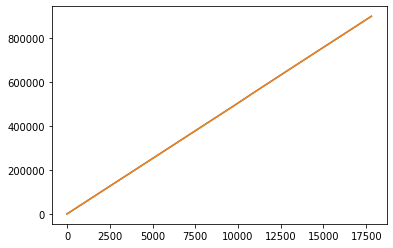

In [4]:
import matplotlib.pyplot as plt

# There was a discontinuity because of a past, longer recording session
# Plot of all frame timestamps

plt.plot(intFrameTimes[:17805])
plt.plot(mainFrameTimes[:17805])

In [5]:
# Check each interframe length

intFrameLengths = np.diff(intFrameTimes)
mainFrameLengths = np.diff(mainFrameTimes)

(array([1.0000e+00, 1.7742e+04, 1.0000e+00, 0.0000e+00, 3.2000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250]),
 <a list of 9 Patch objects>)

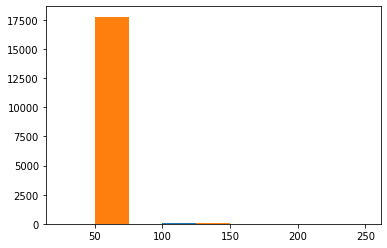

In [6]:
# Histogram of interframe lengths


#plt.hist(frameLengths, bins='auto')
# plt.hist(frameLengths, bins=[-3400, -3000, -2600, -2200, -1800, -1400, -1000, -600, -200, 200, 600, 1000])
plt.hist(intFrameLengths, bins=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250])
plt.hist(mainFrameLengths, bins=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250])

# plt.hist(frameLengths, bins=[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


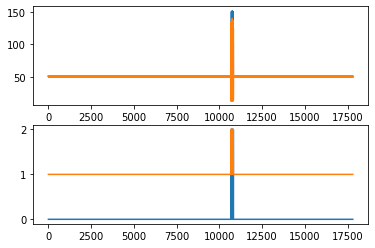

In [7]:
# figure = plt.subplots()

# Plot of all framelengths
plt.subplot(2, 1, 1)
plt.plot(intFrameLengths)

plt.subplot(2, 1, 2)
plt.plot(intFullBuffs)

plt.subplot(2, 1, 1)
plt.plot(mainFrameLengths)

plt.subplot(2, 1, 2)
plt.plot(mainFullBuffs)

# Zoom into where short/long interframe lengths are
# plt.subplot(4, 1, 3)
# plt.plot(frameLengths[45:105])

# plt.subplot(4, 1, 4)
# plt.plot(waitingFrames[45:105])

# figure.tight_layout()
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


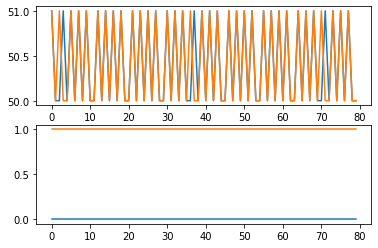

In [8]:
# Zoom into where short/long interframe lengths are
plt.subplot(2, 1, 1)
plt.plot(intFrameLengths[0:80])

plt.subplot(2, 1, 2)
plt.plot(intFullBuffs[0:80])

plt.subplot(2, 1, 1)
plt.plot(mainFrameLengths[0:80])

plt.subplot(2, 1, 2)
plt.plot(mainFullBuffs[0:80])

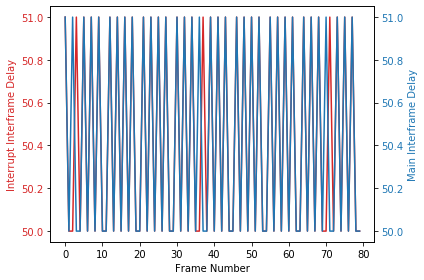

In [9]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Frame Number')
ax1.set_ylabel('Interrupt Interframe Delay', color=color)
ax1.plot(intFrameLengths[0:80], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Main Interframe Delay', color=color)  # we already handled the x-label with ax1
ax2.plot(mainFrameLengths[0:80], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [15]:
print(mainFrameLengths[-20:], "\n", sorted(intFrameLengths)[-10:])

[50 50 51 50 51 50 51 50 51 50 50 51 50 51 50 51 50 51 50 50] 
 [51, 51, 51, 51, 51, 51, 51, 51, 51, 51]


In [17]:
# Check if other interrupts are working fine


print(len(frameList), max(np.diff(frameList)), min(np.diff(frameList)), frameList.count(0), frameList.index(0))
print(len(frameLines), max(frameLines), min(frameLines))
print(len(frameDMA), max(frameDMA), min(frameDMA))

17805 1 1 1 0
17805 296 296
17805 1 1


In [18]:
# Where are the wrong interframe time lengths?

frameTimeDict = {i + 1: frameLengths[i] for i in range(len(frameLengths))} 

longFrameDict = {k: v for k, v in frameTimeDict.items() if (v >51)}
shortFrameDict = {k: v for k, v in frameTimeDict.items() if (v < 50)}
print(sorted(frameLengths))
print(shortFrameDict, longFrameDict, len(longFrameDict) + len(shortFrameDict))

NameError: name 'frameLengths' is not defined

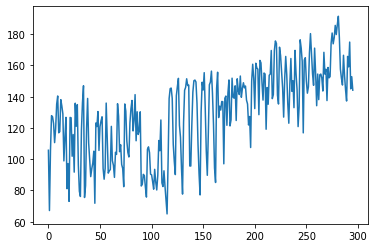

In [23]:
#Begin looking at each frame

frameRowMean = np.mean(frameArray[51], axis=1)
plt.plot(frameRowMean)

In [89]:
# I could do either minimum row or maximum-difference-from-adjacent row and track them through frames.
# Throw out the outliers?
numPlots = 3
darkRowProg = {}
for i in range(numFrame + 1):
    frameRowMean = np.mean(frameArray[i],axis=1) # a list of each row's mean pixel value
    rowMeanDict = {i : frameRowMean[i] for i in range(0, len(frameRowMean))} # a dictionary with row:mean
    threeDarkRows = sorted(rowMeanDict, key=rowMeanDict.get, reverse=False)[:numPlots] # sorted list of three darkest rows
    darkRowProg[i] = threeDarkRows
    
    
#    darkRowVal = {i : rowMeanDict[i] for i in threeDarkRows} # sorted dict of darkest rows/their vals
#    print(darkRowVal)

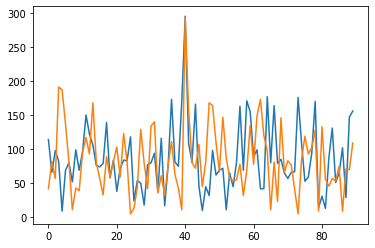

In [90]:
dark1Row = [i[0] for i in darkRowProg.values()]
dark2Row = [i[1] for i in darkRowProg.values()]
dark3Row = [i[2] for i in darkRowProg.values()]
plt.plot(list(darkRowProg.keys()), dark1Row)
plt.plot(list(darkRowProg.keys()), dark2Row)
# plt.plot(list(darkRowProg.keys()), dark3Row)
plt.show()

In [91]:
# Let's try maximum-difference
numPlots = 3
dipRowProg = {}
for i in range(numFrame + 1):
    frameRowMean = np.mean(frameArray[i],axis=1) # a list of each row's mean pixel value
    dipRowMean = np.diff(frameRowMean)
    rowDipDict = {i : dipRowMean[i] for i in range(0, len(dipRowMean))}
    threeDipRows = sorted(rowDipDict, key=rowDipDict.get, reverse=False)[:numPlots] # sorted list of three largest dips
    dipRowProg[i] = threeDipRows

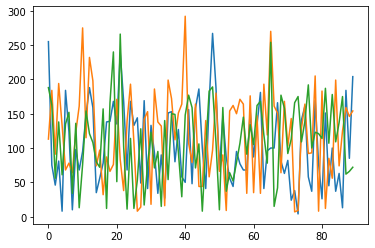

In [92]:
deep1Row = [i[0] for i in dipRowProg.values()]
deep2Row = [i[1] for i in dipRowProg.values()]
deep3Row = [i[2] for i in dipRowProg.values()]
plt.plot(list(darkRowProg.keys()), deep1Row)
plt.plot(list(darkRowProg.keys()), deep2Row)
plt.plot(list(darkRowProg.keys()), deep3Row)
plt.show()